# 数据处理

## 用户数据处理模块

In [62]:
import numpy as np
usr_file = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/users.dat"
# 打开文件，读取所有行到data中
with open(usr_file, 'r') as f:
    data = f.readlines()
# 打印data的数据长度、第一条数据、数据类型
print("data 数据长度是：",len(data))
print("第一条数据是：", data[0])
print("数据类型：", type(data[0]))

data 数据长度是： 6040
第一条数据是： 1::F::1::10::48067

数据类型： <class 'str'>


用户数据一共有6040条，以 :::::: 分隔，是字符串类型。为了方便后续数据读取，区分用户的ID、年龄、职业等数据，一个简单的方式是将数据存储到字典中。并将字符串类型的数据转换成数字类型。将性别M、F转成数字0、1表示。

In [63]:
def gender2num(gender):
    return 1 if gender == 'F' else 0
print("性别M用数字 {} 表示".format(gender2num('M')))
print("性别F用数字 {} 表示".format(gender2num('F')))

性别M用数字 0 表示
性别F用数字 1 表示


In [64]:
usr_info = {}
max_usr_id = 0
#按行索引数据
for item in data:
    # 去除每一行中和数据无关的部分
    item = item.strip().split("::")
    usr_id = item[0]
    # 将字符数据转成数字并保存在字典中
    usr_info[usr_id] = {'usr_id': int(usr_id),
                        'gender': gender2num(item[1]),
                        'age': int(item[2]),
                        'job': int(item[3])}
    max_usr_id = max(max_usr_id, int(usr_id))

print("用户ID为3的用户数据是：", usr_info['3'])

用户ID为3的用户数据是： {'usr_id': 3, 'gender': 0, 'age': 25, 'job': 15}


完整的用户数据处理模块

In [65]:
import numpy as np
def get_usr_info(path):
    # 性别转换函数，M-0， F-1
    def gender2num(gender):
        return 1 if gender == 'F' else 0
    
    # 打开文件，读取所有行到data中
    with open(path, 'r') as f:
        data = f.readlines()
    # 建立用户信息的字典
    use_info = {}
    
    max_usr_id = 0
    #按行索引数据
    for item in data:
        # 去除每一行中和数据无关的部分
        item = item.strip().split("::")
        usr_id = item[0]
        # 将字符数据转成数字并保存在字典中
        use_info[usr_id] = {'usr_id': int(usr_id),'gender': gender2num(item[1]),'age': int(item[2]),'job': int(item[3])}
        max_usr_id = max(max_usr_id, int(usr_id))
    
    return use_info, max_usr_id

usr_file = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/users.dat"
usr_info, max_usr_id = get_usr_info(usr_file)
print("用户数量:", len(usr_info))
print("最大用户ID:", max_usr_id)
print("第1个用户的信息是：", usr_info['1'])

用户数量: 6040
最大用户ID: 6040
第1个用户的信息是： {'usr_id': 1, 'gender': 1, 'age': 1, 'job': 10}


## 电影数据处理模块

读取电影信息文件里的数据。需要注意的是，电影数据的存储方式和用户数据不同，在读取电影数据时，需要指定编码方式为"ISO-8859-1"

In [66]:
movie_info_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/movies.dat"
# 打开文件，编码方式选择ISO-8859-1，读取所有数据到data中
with open(movie_info_path, 'r', encoding="ISO-8859-1") as f:
    data = f.readlines()

# 读取第一条数据，并打印
item = data[0]
print(item)
item = item.strip().split("::")
print("movie ID:", item[0])
print("movie title:", item[1][:-7])
print("movie year:", item[1][-5:-1])
print("movie genre:", item[2].split('|'))

1::Toy Story (1995)::Animation|Children's|Comedy

movie ID: 1
movie title: Toy Story
movie year: 1995
movie genre: ['Animation', "Children's", 'Comedy']


我们看出每条电影数据以 :::::: 分隔，是字符串类型。类似处理用户数据的方式，需要将字符串类型的数据转换成数字类型，存储到字典中。不同的是，在用户数据处理中，我们把性别数据M、F处理成0、1，而电影数据中Title和Genres都是长文本信息，为了便于后续神经网络计算，我们把其中每个单词都拆分出来，不同的单词用对应的数字序号指代。

统计电影ID信息。
统计电影名字的单词，并给每个单词一个数字序号。
统计电影类别单词，并给每个单词一个数字序号。
保存电影数据到字典中，方便根据电影ID进行索引。

统计电影ID信息，将电影ID信息存到字典中，并获得电影ID的最大值。

In [67]:
movie_info_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/movies.dat"
# 打开文件，编码方式选择ISO-8859-1，读取所有数据到data中
with open(movie_info_path, 'r', encoding="ISO-8859-1") as f:
    data = f.readlines()
    
movie_info = {}
for item in data:
    item = item.strip().split("::")
    # 获得电影的ID信息
    v_id = item[0]
    movie_info[v_id] = {'mov_id': int(v_id)}
max_id = max([movie_info[k]['mov_id'] for k in movie_info.keys()])
print("电影的最大ID是：", max_id)

电影的最大ID是： 3952


统计电影名字的单词，并给每个单词一个数字序号
借助自然语言处理中word embedding的方式完成文本到数字向量之间的转换。按照word embedding的步骤，需要先将每个单词用数字代替，然后利用embedding的方法完成数字到映射向量之间的转换。此处，我们只需要先完成文本到数字的转换，即把电影名称的单词用数字代替。在读取电影数据的同时，统计出现过的单词，从数字 1 开始对不同单词进行编码。

In [68]:
# 用于记录电影title每个单词对应哪个序号
movie_titles = {}
#记录电影名字包含的单词最大数量
max_title_length = 0
# 对不同的单词从1 开始计数
t_count = 1
# 按行读取数据并处理
for item in data:
    item = item.strip().split("::")
    # 1. 获得电影的ID信息
    v_id = item[0]
    v_title = item[1][:-7] # 去掉title中年份数据
    v_year = item[1][-5:-1]
    titles = v_title.split()
    # 获得title最大长度
    max_title_length = max((max_title_length, len(titles)))
    
    # 2. 统计电影名字的单词，并给每个单词一个序号，放在movie_titles中
    for t in titles:
        if t not in movie_titles:
            movie_titles[t] = t_count
            t_count += 1
            
    v_tit = [movie_titles[k] for k in titles]
    # 保存电影ID数据和title数据到字典中
    movie_info[v_id] = {'mov_id': int(v_id),
                        'title': v_tit,
                        'years': int(v_year)}
    
print("最大电影title长度是：",  max_title_length)
ID = 1
# 读取第一条数据，并打印
item = data[0]
item = item.strip().split("::")
print("电影 ID:", item[0])
print("电影 title:", item[1][:-7])
print("ID为1 的电影数据是：", movie_info['1'])

最大电影title长度是： 15
电影 ID: 1
电影 title: Toy Story
ID为1 的电影数据是： {'mov_id': 1, 'title': [1, 2], 'years': 1995}


考虑到年份对衡量两个电影的相似度没有很大的影响，后续神经网络处理时，并不使用年份数据。

统计电影类别的单词，并给每个单词一个数字序号

In [69]:
# 用于记录电影类别每个单词对应哪个序号
movie_titles, movie_cat = {}, {}
max_title_length = 0
max_cat_length = 0

t_count, c_count = 1, 1
# 按行读取数据并处理
for item in data:
    item = item.strip().split("::")
    # 1. 获得电影的ID信息
    v_id = item[0]
    cats = item[2].split('|')

    # 获得电影类别数量的最大长度
    max_cat_length = max((max_cat_length, len(cats)))
            
    v_cat = item[2].split('|')
    # 3. 统计电影类别单词，并给每个单词一个序号，放在movie_cat中
    for cat in cats:
        if cat not in movie_cat:
            movie_cat[cat] = c_count
            c_count += 1
    v_cat = [movie_cat[k] for k in v_cat]
    
    # 保存电影ID数据和title数据到字典中
    movie_info[v_id] = {'mov_id': int(v_id),
                        'category': v_cat}
    
print("电影类别数量最多是：",  max_cat_length)
ID = 1
# 读取第一条数据，并打印
item = data[0]
item = item.strip().split("::")
print("电影 ID:", item[0])
print("电影种类 category:", item[2].split('|'))
print("ID为1 的电影数据是：", movie_info['1'])

电影类别数量最多是： 6
电影 ID: 1
电影种类 category: ['Animation', "Children's", 'Comedy']
ID为1 的电影数据是： {'mov_id': 1, 'category': [1, 2, 3]}


电影类别和电影名称定长填充，并保存所有电影数据到字典中
由于每个电影名字和类别的单词数量不一样，转换成数字表示时，还需要通过补0将其补全成固定数据长度。原因是这些数据作为神经网络的输入，其维度影响了第一层网络的权重维度初始化，这要求输入数据的维度是定长的，而不是变长的，所以通过补0使其变为定长输入。补0并不会影响神经网络运算的最终结果。

从上面两段程序我们已知：最大电影名字长度是15，最大电影类别长度是6，15和6分别表示电影名字、种类包含的最多单词数量。因此我们通过补0使电影名字的列表长度为15，使电影种类的列表长度补齐为6。

In [70]:
# 建立三个字典，分别存放电影ID、名字和类别
movie_info, movie_titles, movie_cat = {}, {}, {}
# 对电影名字、类别中不同的单词从 1 开始标号
t_count, c_count = 1, 1

count_tit = {}
# 按行读取数据并处理
for item in data:
    item = item.strip().split("::")
    # 1. 获得电影的ID信息
    v_id = item[0]
    v_title = item[1][:-7] # 去掉title中年份数据
    cats = item[2].split('|')
    v_year = item[1][-5:-1]

    titles = v_title.split()
    # 2. 统计电影名字的单词，并给每个单词一个序号，放在movie_titles中
    for t in titles:
        if t not in movie_titles:
            movie_titles[t] = t_count
            t_count += 1
    # 3. 统计电影类别单词，并给每个单词一个序号，放在movie_cat中
    for cat in cats:
        if cat not in movie_cat:
            movie_cat[cat] = c_count
            c_count += 1
    # 补0使电影名称对应的列表长度为15
    v_tit = [movie_titles[k] for k in titles]
    while len(v_tit)<15:
        v_tit.append(0)
    # 补0使电影种类对应的列表长度为6
    v_cat = [movie_cat[k] for k in cats]
    while len(v_cat)<6:
        v_cat.append(0)
    # 4. 保存电影数据到movie_info中
    movie_info[v_id] = {'mov_id': int(v_id),'title': v_tit,'category': v_cat,'years': int(v_year)}
    
print("电影数据数量：", len(movie_info))
ID = 2
print("原始的电影ID为 {} 的数据是：".format(ID), data[ID-1])
print("电影ID为 {} 的转换后数据是：".format(ID), movie_info[str(ID)])

电影数据数量： 3883
原始的电影ID为 2 的数据是： 2::Jumanji (1995)::Adventure|Children's|Fantasy

电影ID为 2 的转换后数据是： {'mov_id': 2, 'title': [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'category': [4, 2, 5, 0, 0, 0], 'years': 1995}


完整的电影数据处理模块

In [71]:
def get_movie_info(path):
    # 打开文件，编码方式选择ISO-8859-1，读取所有数据到data中 
    with open(path, 'r', encoding="ISO-8859-1") as f:
        data = f.readlines()
    # 建立三个字典，分别用户存放电影所有信息，电影的名字信息、类别信息
    movie_info, movie_titles, movie_cat = {}, {}, {}
    # 对电影名字、类别中不同的单词计数
    t_count, c_count = 1, 1
    # 初始化电影名字和种类的列表
    titles = []
    cats = []
    count_tit = {}
    # 按行读取数据并处理
    for item in data:
        item = item.strip().split("::")
        v_id = item[0]
        v_title = item[1][:-7]
        cats = item[2].split('|')
        v_year = item[1][-5:-1]

        titles = v_title.split()
        # 统计电影名字的单词，并给每个单词一个序号，放在movie_titles中
        for t in titles:
            if t not in movie_titles:
                movie_titles[t] = t_count
                t_count += 1
        # 统计电影类别单词，并给每个单词一个序号，放在movie_cat中
        for cat in cats:
            if cat not in movie_cat:
                movie_cat[cat] = c_count
                c_count += 1
        # 补0使电影名称对应的列表长度为15
        v_tit = [movie_titles[k] for k in titles]
        while len(v_tit)<15:
            v_tit.append(0)
        # 补0使电影种类对应的列表长度为6
        v_cat = [movie_cat[k] for k in cats]
        while len(v_cat)<6:
            v_cat.append(0)
        # 保存电影数据到movie_info中
        movie_info[v_id] = {'mov_id': int(v_id),'title': v_tit,'category': v_cat,'years': int(v_year)}
    return movie_info, movie_cat, movie_titles

movie_info_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/movies.dat"
movie_info, movie_cat, movie_titles = get_movie_info(movie_info_path)
print("电影数量：", len(movie_info))
ID = 1
print("原始的电影ID为 {} 的数据是：".format(ID), data[ID-1])
print("电影ID为 {} 的转换后数据是：".format(ID), movie_info[str(ID)])

print("电影种类对应序号：'Animation':{} 'Children's':{} 'Comedy':{}".format(movie_cat['Animation'],movie_cat["Children's"], movie_cat['Comedy']))
print("电影名称对应序号：'The':{} 'Story':{} ".format(movie_titles['The'], movie_titles['Story']))

电影数量： 3883
原始的电影ID为 1 的数据是： 1::Toy Story (1995)::Animation|Children's|Comedy

电影ID为 1 的转换后数据是： {'mov_id': 1, 'title': [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'category': [1, 2, 3, 0, 0, 0], 'years': 1995}
电影种类对应序号：'Animation':1 'Children's':2 'Comedy':3
电影名称对应序号：'The':26 'Story':2 


## 评分数据处理

In [72]:
use_poster = False
if use_poster:
    rating_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/new_rating.txt"
else:
    rating_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/ratings.dat"
# 打开文件，读取所有行到data中
with open(rating_path, 'r') as f:
    data = f.readlines()
# 打印data的数据长度，以及第一条数据中的用户ID、电影ID和评分信息   
item = data[0]

print(item)

item = item.strip().split("::")
usr_id,movie_id,score = item[0],item[1],item[2]
print("评分数据条数：", len(data))
print("用户ID：", usr_id)
print("电影ID：", movie_id)
print("用户对电影的评分：", score)

1::1193::5::978300760

评分数据条数： 1000209
用户ID： 1
电影ID： 1193
用户对电影的评分： 5


In [73]:
def get_rating_info(path):
    # 打开文件，读取所有行到data中
    with open(path, 'r') as f:
        data = f.readlines()
    # 创建一个字典
    rating_info = {}
    for item in data:
        item = item.strip().split("::")
        # 处理每行数据，分别得到用户ID，电影ID，和评分
        usr_id,movie_id,score = item[0],item[1],item[2]
        if usr_id not in rating_info.keys():
            rating_info[usr_id] = {movie_id:float(score)}
        else:
            rating_info[usr_id][movie_id] = float(score)
    return rating_info

# 获得评分数据
#rating_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/ratings.dat"
rating_info = get_rating_info(rating_path)
print("ID为1的用户一共评价了{}个电影".format(len(rating_info['1'])))

ID为1的用户一共评价了53个电影


## 海报图像读取

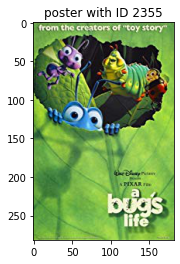

In [74]:
from PIL import Image
import matplotlib.pyplot as plt

# 使用海报图像和不使用海报图像的文件路径不同，处理方式相同
use_poster = True
if use_poster:
    rating_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/new_rating.txt"
else:
    rating_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/ratings.dat"
    
with open(rating_path, 'r') as f:
    data = f.readlines()
    
# 从新的rating文件中收集所有的电影ID
mov_id_collect = []
for item in data:
    item = item.strip().split("::")
    usr_id,movie_id,score = item[0],item[1],item[2]
    mov_id_collect.append(movie_id)


# 根据电影ID读取图像
poster_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/posters/"

# 显示mov_id_collect中第几个电影ID的图像
idx = 1

poster = Image.open(poster_path+'mov_id{}.jpg'.format(str(mov_id_collect[idx])))

plt.figure("Image") # 图像窗口名称
plt.imshow(poster)
plt.axis('on') # 关掉坐标轴为 off
plt.title("poster with ID {}".format(mov_id_collect[idx])) # 图像题目
plt.show()

# 构建数据读取器

首先，构造一个函数，把读取并处理后的数据整合到一起，即在rating数据中补齐用户和电影的所有特征字段。

In [75]:
def get_dataset(usr_info, rating_info, movie_info):
    trainset = []
    # 按照评分数据的key值索引数据
    for usr_id in rating_info.keys():
        usr_ratings = rating_info[usr_id]
        for movie_id in usr_ratings:
            trainset.append({'usr_info': usr_info[usr_id],'mov_info': movie_info[movie_id],'scores': usr_ratings[movie_id]})
    return trainset

dataset = get_dataset(usr_info, rating_info, movie_info)
print("数据集总数据数：", len(dataset))

数据集总数据数： 1000209


数据尺寸的说明：

1，ID类（用户ID，电影ID，性别，年龄，职业）处理成（256）的尺寸，以便后续接入Embedding层，数值256是batchsize。
2，列表类（电影类别）处理成（256,6）的尺寸，数值6是电影最多的类别个数，以便后续接入全连接层。
3，文本类（电影名称）处理成（256,1,15）的尺寸，15是电影名称的最多单词数，以便接入2D卷积层。2D卷积层要求输入数据为四维，对应到图像处理的场景，各个维度的含义是【批次大小，通道数、图像的长、图像的宽】，其中RGB的彩色图像是3通道，灰度图像是单通道。在此处理文本的场景，我们使用2D卷积层需要将输入处理成其所需要的维度数量。因为embedding函数会在输入Tensor shape的最后一维后面添加embedding_dim的维度做为输出的Shape，即当输入为（256,1,15），嵌入向量大小为32时，embedding函数会输出（256,1,15,32），这正好是2D卷积层所需要维度数量。
4，图像类（电影海报）处理成（256,3,64,64）的尺寸， 以便接入2D卷积层。图像的原始尺寸是180*270彩色图像，使用resize函数压缩成64*64的尺寸，减少网络计算。

In [76]:
import random
use_poster = False
def load_data(dataset=None, mode='train'):
    
    # 定义数据迭代Batch大小
    BATCHSIZE = 256

    data_length = len(dataset)
    index_list = list(range(data_length))
    # 定义数据迭代加载器
    def data_generator():
        # 训练模式下，打乱训练数据
        if mode == 'train':
            random.shuffle(index_list)
        # 声明每个特征的列表
        usr_id_list,usr_gender_list,usr_age_list,usr_job_list = [], [], [], []
        mov_id_list,mov_tit_list,mov_cat_list,mov_poster_list = [], [], [], []
        score_list = []
        # 索引遍历输入数据集
        for idx, i in enumerate(index_list):
            # 获得特征数据保存到对应特征列表中
            usr_id_list.append(dataset[i]['usr_info']['usr_id'])
            usr_gender_list.append(dataset[i]['usr_info']['gender'])
            usr_age_list.append(dataset[i]['usr_info']['age'])
            usr_job_list.append(dataset[i]['usr_info']['job'])

            mov_id_list.append(dataset[i]['mov_info']['mov_id'])
            mov_tit_list.append(dataset[i]['mov_info']['title'])
            mov_cat_list.append(dataset[i]['mov_info']['category'])
            mov_id = dataset[i]['mov_info']['mov_id']

            if use_poster:
                # 不使用图像特征时，不读取图像数据，加快数据读取速度
                poster = Image.open(poster_path+'mov_id{}.jpg'.format(str(mov_id)))
                poster = poster.resize([64, 64])
                if len(poster.size) <= 2:
                    poster = poster.convert("RGB")

                mov_poster_list.append(np.array(poster))

            score_list.append(int(dataset[i]['scores']))
            # 如果读取的数据量达到当前的batch大小，就返回当前批次
            if len(usr_id_list)==BATCHSIZE:
                # 转换列表数据为数组形式，reshape到固定形状
                usr_id_arr = np.array(usr_id_list)
                usr_gender_arr = np.array(usr_gender_list)
                usr_age_arr = np.array(usr_age_list)
                usr_job_arr = np.array(usr_job_list)

                mov_id_arr = np.array(mov_id_list)

                mov_cat_arr = np.reshape(np.array(mov_cat_list), [BATCHSIZE, 6]).astype(np.int64)
                mov_tit_arr = np.reshape(np.array(mov_tit_list), [BATCHSIZE, 1, 15]).astype(np.int64)

                if use_poster:
                    mov_poster_arr = np.reshape(np.array(mov_poster_list)/127.5 - 1, [BATCHSIZE, 3, 64, 64]).astype(np.float32)
                else:
                    mov_poster_arr = np.array([0.])
                    
                scores_arr = np.reshape(np.array(score_list), [-1, 1]).astype(np.float32)
                
                # 返回当前批次数据
                yield [usr_id_arr, usr_gender_arr, usr_age_arr, usr_job_arr], \
                       [mov_id_arr, mov_cat_arr, mov_tit_arr, mov_poster_arr], scores_arr
                
                # 清空数据
                usr_id_list, usr_gender_list, usr_age_list, usr_job_list = [], [], [], []
                mov_id_list, mov_tit_list, mov_cat_list, score_list = [], [], [], []
                mov_poster_list = []
    return data_generator

In [77]:
dataset = get_dataset(usr_info, rating_info, movie_info)
print("数据集总数量：", len(dataset))

trainset = dataset[:int(0.8*len(dataset))]
train_loader = load_data(trainset, mode="train")
print("训练集数量：", len(trainset))

validset = dataset[int(0.8*len(dataset)):]
valid_loader = load_data(validset, mode='valid')
print("验证集数量:", len(validset))

数据集总数量： 1000209
训练集数量： 800167
验证集数量: 200042


数据迭代器的使用方式如下：

In [78]:
for idx, data in enumerate(train_loader()):
    usr_data, mov_data, score = data
    
    usr_id_arr, usr_gender_arr, usr_age_arr, usr_job_arr = usr_data
    mov_id_arr, mov_cat_arr, mov_tit_arr, mov_poster_arr = mov_data
    print("用户ID数据尺寸", usr_id_arr.shape)
    print("电影ID数据尺寸", mov_id_arr.shape, ", 电影类别genres数据的尺寸", mov_cat_arr.shape, ", 电影名字title的尺寸", mov_tit_arr.shape)
    break

用户ID数据尺寸 (256,)
电影ID数据尺寸 (256,) , 电影类别genres数据的尺寸 (256, 6) , 电影名字title的尺寸 (256, 1, 15)


# 数据处理模块完整代码

In [79]:
import random
import numpy as np
from PIL import Image

class MovieLen(object):
    def __init__(self, use_poster):
        self.use_poster = use_poster
        # 声明每个数据文件的路径
        usr_info_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/users.dat"
        if use_poster:
            rating_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/new_rating.txt"
        else:
            rating_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/ratings.dat"

        movie_info_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/movies.dat"
        self.poster_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/posters/"
        # 得到电影数据
        self.movie_info, self.movie_cat, self.movie_title = self.get_movie_info(movie_info_path)
        # 记录电影的最大ID
        self.max_mov_cat = np.max([self.movie_cat[k] for k in self.movie_cat])
        self.max_mov_tit = np.max([self.movie_title[k] for k in self.movie_title])
        self.max_mov_id = np.max(list(map(int, self.movie_info.keys())))
        # 记录用户数据的最大ID
        self.max_usr_id = 0
        self.max_usr_age = 0
        self.max_usr_job = 0
        # 得到用户数据
        self.usr_info = self.get_usr_info(usr_info_path)
        # 得到评分数据
        self.rating_info = self.get_rating_info(rating_path)
        # 构建数据集 
        self.dataset = self.get_dataset(usr_info=self.usr_info,rating_info=self.rating_info,movie_info=self.movie_info)
        # 划分数据集，获得数据加载器
        self.train_dataset = self.dataset[:int(len(self.dataset)*0.9)]
        self.valid_dataset = self.dataset[int(len(self.dataset)*0.9):]
        print("##Total dataset instances: ", len(self.dataset))
        print("##MovieLens dataset information: \nusr num: {}\n"
              "movies num: {}".format(len(self.usr_info),len(self.movie_info)))
    # 得到电影数据
    def get_movie_info(self, path):
        # 打开文件，编码方式选择ISO-8859-1，读取所有数据到data中 
        with open(path, 'r', encoding="ISO-8859-1") as f:
            data = f.readlines()
        # 建立三个字典，分别用户存放电影所有信息，电影的名字信息、类别信息
        movie_info, movie_titles, movie_cat = {}, {}, {}
        # 对电影名字、类别中不同的单词计数
        t_count, c_count = 1, 1

        count_tit = {}
        # 按行读取数据并处理
        for item in data:
            item = item.strip().split("::")
            v_id = item[0]
            v_title = item[1][:-7]
            cats = item[2].split('|')
            v_year = item[1][-5:-1]

            titles = v_title.split()
            # 统计电影名字的单词，并给每个单词一个序号，放在movie_titles中
            for t in titles:
                if t not in movie_titles:
                    movie_titles[t] = t_count
                    t_count += 1
            # 统计电影类别单词，并给每个单词一个序号，放在movie_cat中
            for cat in cats:
                if cat not in movie_cat:
                    movie_cat[cat] = c_count
                    c_count += 1
            # 补0使电影名称对应的列表长度为15
            v_tit = [movie_titles[k] for k in titles]
            while len(v_tit)<15:
                v_tit.append(0)
            # 补0使电影种类对应的列表长度为6
            v_cat = [movie_cat[k] for k in cats]
            while len(v_cat)<6:
                v_cat.append(0)
            # 保存电影数据到movie_info中
            movie_info[v_id] = {'mov_id': int(v_id),'title': v_tit,'category': v_cat,'years': int(v_year)}
        return movie_info, movie_cat, movie_titles

    def get_usr_info(self, path):
        # 性别转换函数，M-0， F-1
        def gender2num(gender):
            return 1 if gender == 'F' else 0

        # 打开文件，读取所有行到data中
        with open(path, 'r') as f:
            data = f.readlines()
        # 建立用户信息的字典
        use_info = {}

        max_usr_id = 0
        #按行索引数据
        for item in data:
            # 去除每一行中和数据无关的部分
            item = item.strip().split("::")
            usr_id = item[0]
            # 将字符数据转成数字并保存在字典中
            use_info[usr_id] = {'usr_id': int(usr_id),'gender': gender2num(item[1]),'age': int(item[2]),'job': int(item[3])}
            self.max_usr_id = max(self.max_usr_id, int(usr_id))
            self.max_usr_age = max(self.max_usr_age, int(item[2]))
            self.max_usr_job = max(self.max_usr_job, int(item[3]))
        return use_info
    # 得到评分数据
    def get_rating_info(self, path):
        # 读取文件里的数据
        with open(path, 'r') as f:
            data = f.readlines()
        # 将数据保存在字典中并返回
        rating_info = {}
        for item in data:
            item = item.strip().split("::")
            usr_id,movie_id,score = item[0],item[1],item[2]
            if usr_id not in rating_info.keys():
                rating_info[usr_id] = {movie_id:float(score)}
            else:
                rating_info[usr_id][movie_id] = float(score)
        return rating_info
    # 构建数据集
    def get_dataset(self, usr_info, rating_info, movie_info):
        trainset = []
        for usr_id in rating_info.keys():
            usr_ratings = rating_info[usr_id]
            for movie_id in usr_ratings:
                trainset.append({'usr_info': usr_info[usr_id],'mov_info': movie_info[movie_id],'scores': usr_ratings[movie_id]})
        return trainset
    
    def load_data(self, dataset=None, mode='train'):
        use_poster = False

        # 定义数据迭代Batch大小
        BATCHSIZE = 256

        data_length = len(dataset)
        index_list = list(range(data_length))
        # 定义数据迭代加载器
        def data_generator():
            # 训练模式下，打乱训练数据
            if mode == 'train':
                random.shuffle(index_list)
            # 声明每个特征的列表
            usr_id_list,usr_gender_list,usr_age_list,usr_job_list = [], [], [], []
            mov_id_list,mov_tit_list,mov_cat_list,mov_poster_list = [], [], [], []
            score_list = []
            # 索引遍历输入数据集
            for idx, i in enumerate(index_list):
                # 获得特征数据保存到对应特征列表中
                usr_id_list.append(dataset[i]['usr_info']['usr_id'])
                usr_gender_list.append(dataset[i]['usr_info']['gender'])
                usr_age_list.append(dataset[i]['usr_info']['age'])
                usr_job_list.append(dataset[i]['usr_info']['job'])

                mov_id_list.append(dataset[i]['mov_info']['mov_id'])
                mov_tit_list.append(dataset[i]['mov_info']['title'])
                mov_cat_list.append(dataset[i]['mov_info']['category'])
                mov_id = dataset[i]['mov_info']['mov_id']

                if use_poster:
                    # 不使用图像特征时，不读取图像数据，加快数据读取速度
                    poster = Image.open(self.poster_path+'mov_id{}.jpg'.format(str(mov_id[0])))
                    poster = poster.resize([64, 64])
                    if len(poster.size) <= 2:
                        poster = poster.convert("RGB")

                    mov_poster_list.append(np.array(poster))

                score_list.append(int(dataset[i]['scores']))
                # 如果读取的数据量达到当前的batch大小，就返回当前批次
                if len(usr_id_list)==BATCHSIZE:
                    # 转换列表数据为数组形式，reshape到固定形状
                    usr_id_arr = np.array(usr_id_list)
                    usr_gender_arr = np.array(usr_gender_list)
                    usr_age_arr = np.array(usr_age_list)
                    usr_job_arr = np.array(usr_job_list)

                    mov_id_arr = np.array(mov_id_list)
                    mov_cat_arr = np.reshape(np.array(mov_cat_list), [BATCHSIZE, 6]).astype(np.int64)
                    mov_tit_arr = np.reshape(np.array(mov_tit_list), [BATCHSIZE, 1, 15]).astype(np.int64)

                    if use_poster:
                        mov_poster_arr = np.reshape(np.array(mov_poster_list)/127.5 - 1, [BATCHSIZE, 3, 64, 64]).astype(np.float32)
                    else:
                        mov_poster_arr = np.array([0.])

                    scores_arr = np.reshape(np.array(score_list), [-1, 1]).astype(np.float32)

                    # 放回当前批次数据
                    yield [usr_id_arr, usr_gender_arr, usr_age_arr, usr_job_arr], \
                           [mov_id_arr, mov_cat_arr, mov_tit_arr, mov_poster_arr], scores_arr

                    # 清空数据
                    usr_id_list, usr_gender_list, usr_age_list, usr_job_list = [], [], [], []
                    mov_id_list, mov_tit_list, mov_cat_list, score_list = [], [], [], []
                    mov_poster_list = []
        return data_generator

# 声明数据读取类
dataset = MovieLen(False)
# 定义数据读取器
train_loader = dataset.load_data(dataset=dataset.train_dataset, mode='train')
# 迭代的读取数据， Batchsize = 256
for idx, data in enumerate(train_loader()):
    usr, mov, score = data
    print("打印用户ID，性别，年龄，职业数据的维度：")
    for v in usr:
        print(v.shape)
    print("打印电影ID，名字，类别数据的维度：")
    for v in mov:
        print(v.shape)
    
    break
    

##Total dataset instances:  1000209
##MovieLens dataset information: 
usr num: 6040
movies num: 3883
打印用户ID，性别，年龄，职业数据的维度：
(256,)
(256,)
(256,)
(256,)
打印电影ID，名字，类别数据的维度：
(256,)
(256, 6)
(256, 1, 15)
(1,)


# 构建用户信息的特征提取网络

In [80]:
import paddle
from paddle.nn import Linear, Embedding, Conv2D
import numpy as np
import paddle.nn.functional as F

## 提取用户ID特征

ID特征提取包括两个部分。首先，使用Embedding将用户ID映射为向量；然后，使用一层全连接层和ReLU激活函数进一步提取用户ID特征。需要考虑将用户ID映射为多少维度的向量合适，使用维度过大的向量表示用户ID容易造成信息冗余，维度过低又不足以表示该用户的特征。理论上来说，如果使用二进制表示用户ID，用户最大ID是6040，小于2的13次方，因此，理论上使用13维度的向量已经足够了，为了让不同ID的向量更具区分性，我们选择将用户ID映射为维度为32维的向量。

In [81]:
# 自定义一个用户ID数据
usr_id_data = np.random.randint(0, 6040, (2)).reshape((-1)).astype('int64')
print("输入的用户ID是:", usr_id_data)

USR_ID_NUM = 6040 + 1
# 定义用户ID的embedding层和fc层
usr_emb = Embedding(num_embeddings=USR_ID_NUM,embedding_dim=32,sparse=False)
usr_fc = Linear(in_features=32, out_features=32)

usr_id_var = paddle.to_tensor(usr_id_data)
usr_id_feat = usr_fc(usr_emb(usr_id_var))

usr_id_feat = F.relu(usr_id_feat)
print("用户ID的特征是：", usr_id_feat.numpy(), "\n其形状是：", usr_id_feat.shape)

输入的用户ID是: [4731 1304]
用户ID的特征是： [[0.         0.         0.02004071 0.         0.         0.00902681
  0.01789456 0.00972462 0.         0.         0.01290521 0.01172673
  0.00452683 0.         0.00273889 0.00445306 0.00729546 0.03507235
  0.0150322  0.         0.         0.00578566 0.         0.
  0.01722823 0.         0.         0.01381608 0.02664958 0.
  0.         0.00775418]
 [0.         0.         0.         0.         0.         0.
  0.02819463 0.01904599 0.01050925 0.         0.0084091  0.
  0.         0.0175495  0.         0.00018755 0.         0.
  0.00563071 0.01401953 0.01655127 0.00478947 0.         0.00779931
  0.         0.03320672 0.00137491 0.         0.         0.
  0.01514362 0.0168104 ]] 
其形状是： [2, 32]


注意到，将用户ID映射为one-hot向量时，Embedding层参数size的第一个参数是，在用户的最大ID基础上加上1。原因很简单，从上一节数据处理已经发现，用户ID是从1开始计数的，最大的用户ID是6040。并且已经知道通过Embedding映射输入数据时，是先把输入数据转换成one-hot向量。向量中只有一个 1 的向量才被称为one-hot向量，比如，0 用四维的on-hot向量表示是[1, 0 ,0 ,0]，同时，4维的one-hot向量最大只能表示3。所以，要把数字6040用one-hot向量表示，至少需要用6041维度的向量。
接下来类似的Embeding层也适用于处理用户性别、年龄和职业，以及电影ID等特征，实现代码均是类似的。

## 提取用户性别特征

使用Embedding层和全连接层提取用户性别特征。用户性别不像用户ID数据那样有数千数万种不同数据，性别只有两种可能，不需要使用高维度的向量表示其特征，将用户性别用为16维的向量表示。

In [82]:
# 自定义一个用户性别数据
usr_gender_data = np.array((0, 1)).reshape(-1).astype('int64')
print("输入的用户性别是:", usr_gender_data)

# 用户的性别用0， 1 表示
# 性别最大ID是1，所以Embedding层size的第一个参数设置为1 + 1 = 2
USR_ID_NUM = 2
# 对用户性别信息做映射，并紧接着一个FC层
USR_GENDER_DICT_SIZE = 2
usr_gender_emb = Embedding(num_embeddings=USR_GENDER_DICT_SIZE,embedding_dim=16)

usr_gender_fc = Linear(in_features=16, out_features=16)

usr_gender_var = paddle.to_tensor(usr_gender_data)
usr_gender_feat = usr_gender_fc(usr_gender_emb(usr_gender_var))
usr_gender_feat = F.relu(usr_gender_feat)
print("用户性别特征的数据特征是：", usr_gender_feat.numpy(), "\n其形状是：", usr_gender_feat.shape)
print("\n性别 0 对应的特征是：", usr_gender_feat.numpy()[0, :])
print("性别 1 对应的特征是：", usr_gender_feat.numpy()[1, :])

输入的用户性别是: [0 1]
用户性别特征的数据特征是： [[0.6585897  0.         0.18301493 0.         0.30427054 0.
  0.         0.38322657 0.         0.         0.5934248  0.
  0.         0.         0.22345021 0.        ]
 [0.5436952  0.         0.32491398 0.0856851  0.         0.
  0.59098977 0.43590504 0.33102918 0.71440864 0.         0.
  0.         0.14600182 0.         0.40836322]] 
其形状是： [2, 16]

性别 0 对应的特征是： [0.6585897  0.         0.18301493 0.         0.30427054 0.
 0.         0.38322657 0.         0.         0.5934248  0.
 0.         0.         0.22345021 0.        ]
性别 1 对应的特征是： [0.5436952  0.         0.32491398 0.0856851  0.         0.
 0.59098977 0.43590504 0.33102918 0.71440864 0.         0.
 0.         0.14600182 0.         0.40836322]


##  提取用户年龄特征

In [83]:
# 自定义一个用户年龄数据
usr_age_data = np.array((1, 18)).reshape(-1).astype('int64')
print("输入的用户年龄是:", usr_age_data)

# 对用户年龄信息做映射，并紧接着一个Linear层
# 年龄的最大ID是56，所以Embedding层size的第一个参数设置为56 + 1 = 57
USR_AGE_DICT_SIZE = 56 + 1

usr_age_emb = Embedding(num_embeddings=USR_AGE_DICT_SIZE,embedding_dim=16)
usr_age_fc = Linear(in_features=16, out_features=16)

usr_age = paddle.to_tensor(usr_age_data)
usr_age_feat = usr_age_emb(usr_age)
usr_age_feat = usr_age_fc(usr_age_feat)
usr_age_feat = F.relu(usr_age_feat)

print("用户年龄特征的数据特征是：", usr_age_feat.numpy(), "\n其形状是：", usr_age_feat.shape)
print("\n年龄 1 对应的特征是：", usr_age_feat.numpy()[0, :])
print("年龄 18 对应的特征是：", usr_age_feat.numpy()[1, :])

输入的用户年龄是: [ 1 18]
用户年龄特征的数据特征是： [[0.         0.         0.13084242 0.24162275 0.         0.04666653
  0.10547798 0.         0.06231464 0.         0.148639   0.
  0.06941883 0.         0.10646064 0.17374218]
 [0.         0.         0.0681708  0.         0.10760875 0.07233387
  0.01056442 0.         0.         0.         0.08617057 0.
  0.1042451  0.         0.07484104 0.06749661]] 
其形状是： [2, 16]

年龄 1 对应的特征是： [0.         0.         0.13084242 0.24162275 0.         0.04666653
 0.10547798 0.         0.06231464 0.         0.148639   0.
 0.06941883 0.         0.10646064 0.17374218]
年龄 18 对应的特征是： [0.         0.         0.0681708  0.         0.10760875 0.07233387
 0.01056442 0.         0.         0.         0.08617057 0.
 0.1042451  0.         0.07484104 0.06749661]


## 提取用户职业特征

In [84]:
# 自定义一个用户职业数据
usr_job_data = np.array((0, 20)).reshape(-1).astype('int64')
print("输入的用户职业是:", usr_job_data)

# 对用户职业信息做映射，并紧接着一个Linear层
# 用户职业的最大ID是20，所以Embedding层size的第一个参数设置为20 + 1 = 21
USR_JOB_DICT_SIZE = 20 + 1
usr_job_emb = Embedding(num_embeddings=USR_JOB_DICT_SIZE,embedding_dim=16)
usr_job_fc = Linear(in_features=16, out_features=16)

usr_job = paddle.to_tensor(usr_job_data)
usr_job_feat = usr_job_emb(usr_job)
usr_job_feat = usr_job_fc(usr_job_feat)
usr_job_feat = F.relu(usr_job_feat)

print("用户年龄特征的数据特征是：", usr_job_feat.numpy(), "\n其形状是：", usr_job_feat.shape)
print("\n职业 0 对应的特征是：", usr_job_feat.numpy()[0, :])
print("职业 20 对应的特征是：", usr_job_feat.numpy()[1, :])

输入的用户职业是: [ 0 20]
用户年龄特征的数据特征是： [[0.15576601 0.         0.0755192  0.02419005 0.         0.
  0.         0.         0.42762205 0.00317137 0.         0.18437484
  0.00877841 0.         0.20672223 0.        ]
 [0.34436283 0.10937941 0.15870099 0.         0.04861645 0.221037
  0.         0.         0.25624123 0.05924469 0.         0.01971978
  0.         0.00800365 0.5635621  0.17547216]] 
其形状是： [2, 16]

职业 0 对应的特征是： [0.15576601 0.         0.0755192  0.02419005 0.         0.
 0.         0.         0.42762205 0.00317137 0.         0.18437484
 0.00877841 0.         0.20672223 0.        ]
职业 20 对应的特征是： [0.34436283 0.10937941 0.15870099 0.         0.04861645 0.221037
 0.         0.         0.25624123 0.05924469 0.         0.01971978
 0.         0.00800365 0.5635621  0.17547216]


## 融合用户特征

特征融合是一种常用的特征增强手段，通过结合不同特征的长处，达到取长补短的目的。简单的融合方法有：特征（加权）相加、特征级联、特征正交等等。此处使用特征融合是为了将用户的多个特征融合到一起，用单个向量表示每个用户，更方便计算用户与电影的相似度。上文使用Embedding加全连接的方法，分别得到了用户ID、年龄、性别、职业的特征向量，可以使用全连接层将每个特征映射到固定长度，然后进行相加，得到融合特征。

In [85]:
FC_ID = Linear(in_features=32, out_features=200)
FC_JOB = Linear(in_features=16, out_features=200)
FC_AGE = Linear(in_features=16, out_features=200)
FC_GENDER = Linear(in_features=16, out_features=200)

# 收集所有的用户特征
_features = [usr_id_feat, usr_job_feat, usr_age_feat, usr_gender_feat]
_features = [k.numpy() for k in _features]
_features = [paddle.to_tensor(k) for k in _features]

id_feat = F.tanh(FC_ID(_features[0]))
job_feat = F.tanh(FC_JOB(_features[1]))
age_feat = F.tanh(FC_AGE(_features[2]))
genger_feat = F.tanh(FC_GENDER(_features[-1]))

# 对特征求和
usr_feat = id_feat + job_feat + age_feat + genger_feat
print("用户融合后特征的维度是：", usr_feat.shape)

用户融合后特征的维度是： [2, 200]


## 用户特征提取完整代码实现

In [86]:
import random
import math
class Model(paddle.nn.Layer):
    def __init__(self, use_poster, use_mov_title, use_mov_cat, use_age_job,fc_sizes):
        super(Model, self).__init__()
        
        # 将传入的name信息和bool型参数添加到模型类中
        self.use_mov_poster = use_poster
        self.use_mov_title = use_mov_title
        self.use_usr_age_job = use_age_job
        self.use_mov_cat = use_mov_cat
        self.fc_sizes = fc_sizes
        
        # 使用上节定义的数据处理类，获取数据集的信息，并构建训练和验证集的数据迭代器
        Dataset = MovieLen(self.use_mov_poster)
        self.Dataset = Dataset
        self.trainset = self.Dataset.train_dataset
        self.valset = self.Dataset.valid_dataset
        self.train_loader = self.Dataset.load_data(dataset=self.trainset, mode='train')
        self.valid_loader = self.Dataset.load_data(dataset=self.valset, mode='valid')

        """ define network layer for embedding usr info """
        USR_ID_NUM = Dataset.max_usr_id + 1
        # 对用户ID做映射，并紧接着一个FC层
        self.usr_emb = Embedding(num_embeddings=USR_ID_NUM,embedding_dim=32)
        self.usr_fc = Linear(32, 32)
        
        # 对用户性别信息做映射，并紧接着一个FC层
        USR_GENDER_DICT_SIZE = 2
        self.usr_gender_emb = Embedding(num_embeddings=USR_GENDER_DICT_SIZE,embedding_dim=16)
        self.usr_gender_fc = Linear(16, 16)
        
        # 对用户年龄信息做映射，并紧接着一个FC层
        USR_AGE_DICT_SIZE = Dataset.max_usr_age + 1
        self.usr_age_emb = Embedding(num_embeddings=USR_AGE_DICT_SIZE,embedding_dim=16)
        self.usr_age_fc = Linear(16, 16)
        
        # 对用户职业信息做映射，并紧接着一个FC层
        USR_JOB_DICT_SIZE = Dataset.max_usr_job + 1
        self.usr_job_emb = Embedding(num_embeddings=USR_JOB_DICT_SIZE,embedding_dim=16)
        self.usr_job_fc = Linear(16, 16)
        
        # 新建一个FC层，用于整合用户数据信息
        self.usr_combined = Linear(80, 200)

        # 新建一个Linear层，用于整合电影特征
        self.mov_concat_embed = Linear(in_features=96, out_features=200)

        user_sizes = [200] + self.fc_sizes
        acts = ["relu" for _ in range(len(self.fc_sizes))]
        self._user_layers = []
        for i in range(len(self.fc_sizes)):
            linear = paddle.nn.Linear(
                in_features=user_sizes[i],
                out_features=user_sizes[i + 1],
                weight_attr=paddle.ParamAttr(
                    initializer=paddle.nn.initializer.Normal(
                        std=1.0 / math.sqrt(user_sizes[i]))))
            self.add_sublayer('linear_user_%d' % i, linear)
            self._user_layers.append(linear)
            if acts[i] == 'relu':
                act = paddle.nn.ReLU()
                self.add_sublayer('user_act_%d' % i, act)
                self._user_layers.append(act)
        
    
    # 定义计算用户特征的前向运算过程
    def get_usr_feat(self, usr_var):
        """ get usr features"""
        # 获取到用户数据
        usr_id, usr_gender, usr_age, usr_job = usr_var
        # 将用户的ID数据经过embedding和FC计算，得到的特征保存在feats_collect中
        feats_collect = []
        usr_id = self.usr_emb(usr_id)
        usr_id = self.usr_fc(usr_id)
        usr_id = F.relu(usr_id)
        feats_collect.append(usr_id)
        
        # 计算用户的性别特征，并保存在feats_collect中
        usr_gender = self.usr_gender_emb(usr_gender)
        usr_gender = self.usr_gender_fc(usr_gender)
        usr_gender = F.relu(usr_gender)
        
        feats_collect.append(usr_gender)
        # 选择是否使用用户的年龄-职业特征
        if self.use_usr_age_job:
            # 计算用户的年龄特征，并保存在feats_collect中
            usr_age = self.usr_age_emb(usr_age)
            usr_age = self.usr_age_fc(usr_age)
            usr_age = F.relu(usr_age)
            feats_collect.append(usr_age)
            # 计算用户的职业特征，并保存在feats_collect中
            usr_job = self.usr_job_emb(usr_job)
            usr_job = self.usr_job_fc(usr_job)
            usr_job = F.relu(usr_job)
            feats_collect.append(usr_job)
        
        # 将用户的特征级联，并通过FC层得到最终的用户特征
        print([f.shape for f in feats_collect])
        usr_feat = paddle.concat(feats_collect, axis=1)
        user_features = F.tanh(self.usr_combined(usr_feat))
        #通过3层全链接层，获得用于计算相似度的用户特征和电影特征
        for n_layer in self._user_layers:
            user_features = n_layer(user_features)
        return user_features
    
#下面使用定义好的数据读取器，实现从用户数据读取到用户特征计算的流程：
## 测试用户特征提取网络
fc_sizes=[128, 64, 32]
model = Model(use_poster=False, use_mov_title=True, use_mov_cat=True, use_age_job=True,fc_sizes=fc_sizes)
model.eval()

data_loader = model.train_loader

for idx, data in enumerate(data_loader()):
    # 获得数据，并转为动态图格式，
    usr, mov, score = data
#         print(usr.shape)
    # 只使用每个Batch的第一条数据
    usr_v = [[var[0]] for var in usr]
    
    
    print("输入的用户ID数据：{}\n性别数据：{} \n年龄数据：{} \n职业数据{}".format(*usr_v))
    
    usr_v = [paddle.to_tensor(np.array(var)) for var in usr_v]
    usr_feat = model.get_usr_feat(usr_v)
    print("计算得到的用户特征维度是：", usr_feat.shape)
    break
        

##Total dataset instances:  1000209
##MovieLens dataset information: 
usr num: 6040
movies num: 3883
输入的用户ID数据：[2148]
性别数据：[1] 
年龄数据：[18] 
职业数据[0]
[[1, 32], [1, 16], [1, 16], [1, 16]]
计算得到的用户特征维度是： [1, 32]


# 电影特征提取网络

电影特征网络主要包括：

将电影ID数据映射为向量表示，通过全连接层得到ID特征。
将电影类别数据映射为向量表示，对电影类别的向量求和得到类别特征。
将电影名称数据映射为向量表示，通过卷积层计算得到名称特征。

## 提取电影ID特征

In [87]:
# 自定义一个电影ID数据
mov_id_data = np.array((1, 2)).reshape(-1).astype('int64')
# 对电影ID信息做映射，并紧接着一个FC层
MOV_DICT_SIZE = 3952 + 1
mov_emb = Embedding(num_embeddings=MOV_DICT_SIZE, embedding_dim=32)
mov_fc = Linear(32, 32)

print("输入的电影ID是:", mov_id_data)
mov_id_data = paddle.to_tensor(mov_id_data)
mov_id_feat = mov_fc(mov_emb(mov_id_data))
mov_id_feat = F.relu(mov_id_feat)
print("计算的电影ID的特征是", mov_id_feat.numpy(), "\n其形状是：", mov_id_feat.shape)
print("\n电影ID为 {} 计算得到的特征是：{}".format(mov_id_data.numpy()[0], mov_id_feat.numpy()[0]))
print("电影ID为 {} 计算得到的特征是：{}".format(mov_id_data.numpy()[1], mov_id_feat.numpy()[1]))

输入的电影ID是: [1 2]
计算的电影ID的特征是 [[0.01013822 0.04028599 0.         0.01227449 0.00360744 0.01018874
  0.         0.         0.06516276 0.01937556 0.         0.
  0.         0.         0.02534721 0.         0.00077292 0.
  0.         0.         0.         0.00871216 0.         0.
  0.         0.03179899 0.         0.         0.         0.
  0.02006807 0.01402024]
 [0.00180001 0.00938904 0.         0.         0.01350835 0.
  0.         0.0367669  0.         0.03903815 0.         0.
  0.         0.02384252 0.00290765 0.03307265 0.         0.
  0.         0.         0.00792981 0.         0.         0.
  0.00851009 0.         0.         0.01261176 0.03123872 0.00164403
  0.00234508 0.02229211]] 
其形状是： [2, 32]

电影ID为 1 计算得到的特征是：[0.01013822 0.04028599 0.         0.01227449 0.00360744 0.01018874
 0.         0.         0.06516276 0.01937556 0.         0.
 0.         0.         0.02534721 0.         0.00077292 0.
 0.         0.         0.         0.00871216 0.         0.
 0.         0.03179899 0.   

## 提取电影类别特征

通过Embedding网络层将电影类别数字映射为特征向量；
对Embedding后的向量沿着类别数量维度进行求和，得到一个类别映射向量；
通过一个全连接层计算类别特征向量。

In [88]:
# 自定义一个电影类别数据
mov_cat_data = np.array(((1, 2, 3, 0, 0, 0), (2, 3, 4, 0, 0, 0))).reshape(2, -1).astype('int64')
# 对电影ID信息做映射，并紧接着一个Linear层
MOV_DICT_SIZE = 6 + 1
mov_emb = Embedding(num_embeddings=MOV_DICT_SIZE, embedding_dim=32)
mov_fc = Linear(in_features=32, out_features=32)

print("输入的电影类别是:", mov_cat_data[:, :])
mov_cat_data = paddle.to_tensor(mov_cat_data)
# 1. 通过Embedding映射电影类别数据；
mov_cat_feat = mov_emb(mov_cat_data)
# 2. 对Embedding后的向量沿着类别数量维度进行求和，得到一个类别映射向量；
mov_cat_feat = paddle.sum(mov_cat_feat, axis=1, keepdim=False)

# 3. 通过一个全连接层计算类别特征向量。
mov_cat_feat = mov_fc(mov_cat_feat)
mov_cat_feat = F.relu(mov_cat_feat)
print("计算的电影类别的特征是", mov_cat_feat.numpy(), "\n其形状是：", mov_cat_feat.shape)
print("\n电影类别为 {} 计算得到的特征是：{}".format(mov_cat_data.numpy()[0, :], mov_cat_feat.numpy()[0]))
print("\n电影类别为 {} 计算得到的特征是：{}".format(mov_cat_data.numpy()[1, :], mov_cat_feat.numpy()[1]))

输入的电影类别是: [[1 2 3 0 0 0]
 [2 3 4 0 0 0]]
计算的电影类别的特征是 [[0.         0.20207779 0.42464274 0.         0.         0.
  0.         0.538478   0.         0.448615   0.         0.5169811
  0.         0.0216161  0.74683696 0.         0.         0.
  0.         0.         0.         0.         0.45070466 1.2080883
  0.         0.         0.         0.61631465 0.93608755 0.6936143
  0.77466697 0.        ]
 [0.         0.47719514 0.32316113 0.07012451 0.         0.
  0.         0.8572202  0.         0.         0.         0.10304457
  0.         0.42257276 0.6925732  0.10712135 0.         0.
  0.         0.         0.         0.         0.5230184  1.0607558
  0.         0.         0.         0.66810125 0.528809   0.49297056
  0.86095953 0.        ]] 
其形状是： [2, 32]

电影类别为 [1 2 3 0 0 0] 计算得到的特征是：[0.         0.20207779 0.42464274 0.         0.         0.
 0.         0.538478   0.         0.448615   0.         0.5169811
 0.         0.0216161  0.74683696 0.         0.         0.
 0.         0.         

## 提取电影名称特征

通过Embedding映射电影名称数据，得到对应的特征向量；
对Embedding后的向量使用卷积层+全连接层进一步提取特征；
对特征进行降采样，降低数据维度。

提取电影名称特征时，使用了卷积层加全连接层的方式提取特征。这是因为电影名称单词较多，最大单词数量是15，如果采用和电影类别同样的处理方式，即沿着数量维度求和，显然会损失很多信息。考虑到15这个维度较高，可以使用卷积层进一步提取特征，同时通过控制卷积层的步长，降低电影名称特征的维度。

如果只是简单的经过一层或二层卷积后，特征的维度依然很大，为了得到更低维度的特征向量，有两种方式，一种是利用求和降采样的方式，另一种是继续使用神经网络层进行特征提取并逐渐降低特征维度。

In [89]:
# 自定义两个电影名称数据
mov_title_data = np.array(((1, 2, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 
                            (2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0))).reshape(2, 1, 15).astype('int64')
# 对电影名称做映射，紧接着FC和pool层
MOV_TITLE_DICT_SIZE = 1000 + 1
mov_title_emb = Embedding(num_embeddings=MOV_TITLE_DICT_SIZE, embedding_dim=32)
mov_title_conv = Conv2D(in_channels=1, out_channels=1, kernel_size=(3, 1), stride=(2, 1), padding=0)
# 使用 3 * 3卷积层代替全连接层
mov_title_conv2 = Conv2D(in_channels=1, out_channels=1, kernel_size=(3, 1), stride=1, padding=0)

mov_title_data = paddle.to_tensor(mov_title_data)
print("电影名称数据的输入形状: ", mov_title_data.shape)
# 1. 通过Embedding映射电影名称数据；
mov_title_feat = mov_title_emb(mov_title_data)
print("输入通过Embedding层的输出形状: ", mov_title_feat.shape)
# 2. 对Embedding后的向量使用卷积层进一步提取特征；
mov_title_feat = F.relu(mov_title_conv(mov_title_feat))
print("第一次卷积之后的特征输出形状: ", mov_title_feat.shape)
mov_title_feat = F.relu(mov_title_conv2(mov_title_feat))
print("第二次卷积之后的特征输出形状: ", mov_title_feat.shape)

batch_size = mov_title_data.shape[0]
# 3. 最后对特征进行降采样，keepdim=False会让输出的维度减少，而不是用[2,1,1,32]的形式占位；
mov_title_feat = paddle.sum(mov_title_feat, axis=2, keepdim=False)
print("reduce_sum降采样后的特征输出形状: ", mov_title_feat.shape)

mov_title_feat = F.relu(mov_title_feat)
mov_title_feat = paddle.reshape(mov_title_feat, [batch_size, -1])
print("电影名称特征的最终特征输出形状：", mov_title_feat.shape)

print("\n计算的电影名称的特征是", mov_title_feat.numpy(), "\n其形状是：", mov_title_feat.shape)
print("\n电影名称为 {} 计算得到的特征是：{}".format(mov_title_data.numpy()[0,:, 0], mov_title_feat.numpy()[0]))
print("\n电影名称为 {} 计算得到的特征是：{}".format(mov_title_data.numpy()[1,:, 0], mov_title_feat.numpy()[1]))

电影名称数据的输入形状:  [2, 1, 15]
输入通过Embedding层的输出形状:  [2, 1, 15, 32]
第一次卷积之后的特征输出形状:  [2, 1, 7, 32]
第二次卷积之后的特征输出形状:  [2, 1, 5, 32]
reduce_sum降采样后的特征输出形状:  [2, 1, 32]
电影名称特征的最终特征输出形状： [2, 32]

计算的电影名称的特征是 [[0.         0.00495228 0.02283933 0.0174677  0.00300466 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.01803221 0.         0.         0.
  0.         0.         0.01732878 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.0100283  0.        ]
 [0.0059508  0.00495228 0.         0.         0.         0.01820913
  0.         0.         0.         0.         0.         0.
  0.         0.01338443 0.         0.         0.         0.
  0.         0.00746228 0.         0.         0.         0.
  0.0075217  0.         0.         0.         0.         0.
  0.         0.        ]] 
其形状是： [2, 32]

电影名称为 [1] 计算得到的特征是：[0.         0.00495228 0.02283933 0.0174677  0.00300466 0.
 0.         0.         0.         0.         0.   

## 融合电影特征

In [90]:
mov_combined = Linear(in_features=96, out_features=200)
# 收集所有的电影特征
_features = [mov_id_feat, mov_cat_feat, mov_title_feat]
_features = [k.numpy() for k in _features]
_features = [paddle.to_tensor(k) for k in _features]

# 对特征沿着最后一个维度级联
mov_feat = paddle.concat(_features, axis=1)
mov_feat = mov_combined(mov_feat)
mov_feat = F.tanh(mov_feat)
print("融合后的电影特征维度是：", mov_feat.shape)

融合后的电影特征维度是： [2, 200]


## 电影特征提取的网络

In [91]:
class MovModel(paddle.nn.Layer):
    def __init__(self, use_poster, use_mov_title, use_mov_cat, use_age_job,fc_sizes):
        super(MovModel, self).__init__()
                
        # 将传入的name信息和bool型参数添加到模型类中
        self.use_mov_poster = use_poster
        self.use_mov_title = use_mov_title
        self.use_usr_age_job = use_age_job
        self.use_mov_cat = use_mov_cat
        self.fc_sizes = fc_sizes
        
        # 获取数据集的信息，并构建训练和验证集的数据迭代器
        Dataset = MovieLen(self.use_mov_poster)
        self.Dataset = Dataset
        self.trainset = self.Dataset.train_dataset
        self.valset = self.Dataset.valid_dataset
        self.train_loader = self.Dataset.load_data(dataset=self.trainset, mode='train')
        self.valid_loader = self.Dataset.load_data(dataset=self.valset, mode='valid')

        """ define network layer for embedding usr info """
        # 对电影ID信息做映射，并紧接着一个Linear层
        MOV_DICT_SIZE = Dataset.max_mov_id + 1
        self.mov_emb = Embedding(num_embeddings=MOV_DICT_SIZE, embedding_dim=32)
        self.mov_fc = Linear(32, 32)
        
        # 对电影类别做映射
        CATEGORY_DICT_SIZE = len(Dataset.movie_cat) + 1
        self.mov_cat_emb = Embedding(num_embeddings=CATEGORY_DICT_SIZE, embedding_dim=32)
        self.mov_cat_fc = Linear(32, 32)
        
        # 对电影名称做映射
        MOV_TITLE_DICT_SIZE = len(Dataset.movie_title) + 1
        self.mov_title_emb = Embedding(num_embeddings=MOV_TITLE_DICT_SIZE, embedding_dim=32)
        self.mov_title_conv = Conv2D(in_channels=1, out_channels=1, kernel_size=(3, 1), stride=(2,1), padding=0)
        self.mov_title_conv2 = Conv2D(in_channels=1, out_channels=1, kernel_size=(3, 1), stride=1, padding=0)

        # 新建一个Linear层，用于整合电影特征
        self.mov_concat_embed = Linear(in_features=96, out_features=200)
        
        #电影特征和用户特征使用了不同的全连接层，不共享参数
        movie_sizes = [200] + self.fc_sizes
        acts = ["relu" for _ in range(len(self.fc_sizes))]
        self._movie_layers = []
        for i in range(len(self.fc_sizes)):
            linear = paddle.nn.Linear(
                in_features=movie_sizes[i],
                out_features=movie_sizes[i + 1],
                weight_attr=paddle.ParamAttr(
                    initializer=paddle.nn.initializer.Normal(
                        std=1.0 / math.sqrt(movie_sizes[i]))))
            self.add_sublayer('linear_movie_%d' % i, linear)
            self._movie_layers.append(linear)
            if acts[i] == 'relu':
                act = paddle.nn.ReLU()
                self.add_sublayer('movie_act_%d' % i, act)
                self._movie_layers.append(act)

    # 定义电影特征的前向计算过程
    def get_mov_feat(self, mov_var):
        """ get movie features"""
        # 获得电影数据
        mov_id, mov_cat, mov_title, mov_poster = mov_var
        feats_collect = []
        # 获得batchsize的大小
        batch_size = mov_id.shape[0]
        # 计算电影ID的特征，并存在feats_collect中
        mov_id = self.mov_emb(mov_id)
        mov_id = self.mov_fc(mov_id)
        mov_id = F.relu(mov_id)
        feats_collect.append(mov_id)
        
        # 如果使用电影的种类数据，计算电影种类特征的映射
        if self.use_mov_cat:
            # 计算电影种类的特征映射，对多个种类的特征求和得到最终特征
            mov_cat = self.mov_cat_emb(mov_cat)
            print(mov_title.shape)
            mov_cat = paddle.sum(mov_cat, axis=1, keepdim=False)

            mov_cat = self.mov_cat_fc(mov_cat)
            feats_collect.append(mov_cat)

        if self.use_mov_title:
            # 计算电影名字的特征映射，对特征映射使用卷积计算最终的特征
            mov_title = self.mov_title_emb(mov_title)
            mov_title = F.relu(self.mov_title_conv2(F.relu(self.mov_title_conv(mov_title))))
            
            mov_title = paddle.sum(mov_title, axis=2, keepdim=False)
            mov_title = F.relu(mov_title)
            mov_title = paddle.reshape(mov_title, [batch_size, -1])
            feats_collect.append(mov_title)
            
        # 使用一个全连接层，整合所有电影特征，映射为一个200维的特征向量
        mov_feat = paddle.concat(feats_collect, axis=1)
        mov_features = F.tanh(self.mov_concat_embed(mov_feat))
        for n_layer in self._movie_layers:
            mov_features = n_layer(mov_features)
        return mov_features

# 使用定义好的数据读取器，实现从电影数据中提取电影特征

In [92]:
## 测试电影特征提取网络
fc_sizes=[128, 64, 32]
model = MovModel(use_poster=False, use_mov_title=True, use_mov_cat=True, use_age_job=True,fc_sizes=fc_sizes)
model.eval()

data_loader = model.train_loader

for idx, data in enumerate(data_loader()):
    # 获得数据，并转为动态图格式
    usr, mov, score = data
    # 只使用每个Batch的第一条数据
    mov_v = [var[0:1] for var in mov]
    
    _mov_v = [np.squeeze(var[0:1]) for var in mov]
    print("输入的电影ID数据：{}\n类别数据：{} \n名称数据：{} ".format(*_mov_v))
    mov_v = [paddle.to_tensor(var) for var in mov_v]
    mov_feat = model.get_mov_feat(mov_v)
    print("计算得到的电影特征维度是：", mov_feat.shape)
    break

##Total dataset instances:  1000209
##MovieLens dataset information: 
usr num: 6040
movies num: 3883
输入的电影ID数据：3479
类别数据：[4 5 6 0 0 0] 
名称数据：[4713    0    0    0    0    0    0    0    0    0    0    0    0    0
    0] 
[1, 1, 15]
计算得到的电影特征维度是： [1, 32]


# 模型设计的完整代码

In [93]:
class Model(paddle.nn.Layer):
    def __init__(self, use_poster, use_mov_title, use_mov_cat, use_age_job):
        super(Model, self).__init__()
        
        # 将传入的name信息和bool型参数添加到模型类中
        self.use_mov_poster = use_poster
        self.use_mov_title = use_mov_title
        self.use_usr_age_job = use_age_job
        self.use_mov_cat = use_mov_cat
        
        # 获取数据集的信息，并构建训练和验证集的数据迭代器
        Dataset = MovieLen(self.use_mov_poster)
        self.Dataset = Dataset
        self.trainset = self.Dataset.train_dataset
        self.valset = self.Dataset.valid_dataset
        self.train_loader = self.Dataset.load_data(dataset=self.trainset, mode='train')
        self.valid_loader = self.Dataset.load_data(dataset=self.valset, mode='valid')

        """ define network layer for embedding usr info """
        USR_ID_NUM = Dataset.max_usr_id + 1
        # 对用户ID做映射，并紧接着一个Linear层
        self.usr_emb = Embedding(num_embeddings=USR_ID_NUM, embedding_dim=32, sparse=False)
        self.usr_fc = Linear(in_features=32, out_features=32)
        
        # 对用户性别信息做映射，并紧接着一个Linear层
        USR_GENDER_DICT_SIZE = 2
        self.usr_gender_emb = Embedding(num_embeddings=USR_GENDER_DICT_SIZE, embedding_dim=16)
        self.usr_gender_fc = Linear(in_features=16, out_features=16)
        
        # 对用户年龄信息做映射，并紧接着一个Linear层
        USR_AGE_DICT_SIZE = Dataset.max_usr_age + 1
        self.usr_age_emb = Embedding(num_embeddings=USR_AGE_DICT_SIZE, embedding_dim=16)
        self.usr_age_fc = Linear(in_features=16, out_features=16)
        
        # 对用户职业信息做映射，并紧接着一个Linear层
        USR_JOB_DICT_SIZE = Dataset.max_usr_job + 1
        self.usr_job_emb = Embedding(num_embeddings=USR_JOB_DICT_SIZE, embedding_dim=16)
        self.usr_job_fc = Linear(in_features=16, out_features=16)
        
        # 新建一个Linear层，用于整合用户数据信息
        self.usr_combined = Linear(in_features=80, out_features=200)
        
        """ define network layer for embedding usr info """
        # 对电影ID信息做映射，并紧接着一个Linear层
        MOV_DICT_SIZE = Dataset.max_mov_id + 1
        self.mov_emb = Embedding(num_embeddings=MOV_DICT_SIZE, embedding_dim=32)
        self.mov_fc = Linear(in_features=32, out_features=32)
        
        # 对电影类别做映射
        CATEGORY_DICT_SIZE = len(Dataset.movie_cat) + 1
        self.mov_cat_emb = Embedding(num_embeddings=CATEGORY_DICT_SIZE, embedding_dim=32, sparse=False)
        self.mov_cat_fc = Linear(in_features=32, out_features=32)
        
        # 对电影名称做映射
        MOV_TITLE_DICT_SIZE = len(Dataset.movie_title) + 1
        self.mov_title_emb = Embedding(num_embeddings=MOV_TITLE_DICT_SIZE, embedding_dim=32, sparse=False)
        self.mov_title_conv = Conv2D(in_channels=1, out_channels=1, kernel_size=(3, 1), stride=(2,1), padding=0)
        self.mov_title_conv2 = Conv2D(in_channels=1, out_channels=1, kernel_size=(3, 1), stride=1, padding=0)
        
        # 新建一个FC层，用于整合电影特征
        self.mov_concat_embed = Linear(in_features=96, out_features=200)

        user_sizes = [200] + self.fc_sizes
        acts = ["relu" for _ in range(len(self.fc_sizes))]
        self._user_layers = []
        for i in range(len(self.fc_sizes)):
            linear = paddle.nn.Linear(
                in_features=user_sizes[i],
                out_features=user_sizes[i + 1],
                weight_attr=paddle.ParamAttr(
                    initializer=paddle.nn.initializer.Normal(
                        std=1.0 / math.sqrt(user_sizes[i]))))
            self.add_sublayer('linear_user_%d' % i, linear)
            self._user_layers.append(linear)
            if acts[i] == 'relu':
                act = paddle.nn.ReLU()
                self.add_sublayer('user_act_%d' % i, act)
                self._user_layers.append(act)
        
        #电影特征和用户特征使用了不同的全连接层，不共享参数
        movie_sizes = [200] + self.fc_sizes
        acts = ["relu" for _ in range(len(self.fc_sizes))]
        self._movie_layers = []
        for i in range(len(self.fc_sizes)):
            linear = paddle.nn.Linear(
                in_features=movie_sizes[i],
                out_features=movie_sizes[i + 1],
                weight_attr=paddle.ParamAttr(
                    initializer=paddle.nn.initializer.Normal(
                        std=1.0 / math.sqrt(movie_sizes[i]))))
            self.add_sublayer('linear_movie_%d' % i, linear)
            self._movie_layers.append(linear)
            if acts[i] == 'relu':
                act = paddle.nn.ReLU()
                self.add_sublayer('movie_act_%d' % i, act)
                self._movie_layers.append(act)
        
    # 定义计算用户特征的前向运算过程
    def get_usr_feat(self, usr_var):
        """ get usr features"""
        # 获取到用户数据
        usr_id, usr_gender, usr_age, usr_job = usr_var
        # 将用户的ID数据经过embedding和Linear计算，得到的特征保存在feats_collect中
        feats_collect = []
        usr_id = self.usr_emb(usr_id)
        usr_id = self.usr_fc(usr_id)
        usr_id = F.relu(usr_id)
        feats_collect.append(usr_id)
        
        # 计算用户的性别特征，并保存在feats_collect中
        usr_gender = self.usr_gender_emb(usr_gender)
        usr_gender = self.usr_gender_fc(usr_gender)
        usr_gender = F.relu(usr_gender)
        feats_collect.append(usr_gender)
        # 选择是否使用用户的年龄-职业特征
        if self.use_usr_age_job:
            # 计算用户的年龄特征，并保存在feats_collect中
            usr_age = self.usr_age_emb(usr_age)
            usr_age = self.usr_age_fc(usr_age)
            usr_age = F.relu(usr_age)
            feats_collect.append(usr_age)
            # 计算用户的职业特征，并保存在feats_collect中
            usr_job = self.usr_job_emb(usr_job)
            usr_job = self.usr_job_fc(usr_job)
            usr_job = F.relu(usr_job)
            feats_collect.append(usr_job)
        
        # 将用户的特征级联，并通过Linear层得到最终的用户特征
        usr_feat = paddle.concat(feats_collect, axis=1)
        user_features = F.tanh(self.usr_combined(usr_feat))
        #通过4层全链接层，获得用于计算相似度的用户特征和电影特征
        for n_layer in self._user_layers:
            user_features = n_layer(user_features)

        return user_features

        # 定义电影特征的前向计算过程
    def get_mov_feat(self, mov_var):
        """ get movie features"""
        # 获得电影数据
        mov_id, mov_cat, mov_title, mov_poster = mov_var
        feats_collect = []
        # 获得batchsize的大小
        batch_size = mov_id.shape[0]
        # 计算电影ID的特征，并存在feats_collect中
        mov_id = self.mov_emb(mov_id)
        mov_id = self.mov_fc(mov_id)
        mov_id = F.relu(mov_id)
        feats_collect.append(mov_id)
        
        # 如果使用电影的种类数据，计算电影种类特征的映射
        if self.use_mov_cat:
            # 计算电影种类的特征映射，对多个种类的特征求和得到最终特征
            mov_cat = self.mov_cat_emb(mov_cat)
            mov_cat = paddle.sum(mov_cat, axis=1, keepdim=False)

            mov_cat = self.mov_cat_fc(mov_cat)
            feats_collect.append(mov_cat)

        if self.use_mov_title:
            # 计算电影名字的特征映射，对特征映射使用卷积计算最终的特征
            mov_title = self.mov_title_emb(mov_title)
            mov_title = F.relu(self.mov_title_conv2(F.relu(self.mov_title_conv(mov_title))))
            mov_title = paddle.sum(mov_title, axis=2, keepdim=False)
            mov_title = F.relu(mov_title)
            mov_title = paddle.reshape(mov_title, [batch_size, -1])
            feats_collect.append(mov_title)
            
        # 使用一个全连接层，整合所有电影特征，映射为一个200维的特征向量
        mov_feat = paddle.concat(feats_collect, axis=1)
        mov_features = F.tanh(self.mov_concat_embed(mov_feat))

        for n_layer in self._movie_layers:
            mov_features = n_layer(mov_features)

        return mov_features
    
    # 定义个性化推荐算法的前向计算
    def forward(self, usr_var, mov_var):
        # 计算用户特征和电影特征
        usr_feat = self.get_usr_feat(usr_var)
        mov_feat = self.get_mov_feat(mov_var)

        #通过3层全连接层，获得用于计算相似度的用户特征和电影特征
        for n_layer in self._user_layers:
            user_features = n_layer(user_features)

        for n_layer in self._movie_layers:
            mov_features = n_layer(mov_features)

        # 根据计算的特征计算相似度
        res = F.common.cosine_similarity(user_features, mov_features)
        # 将相似度扩大范围到和电影评分相同数据范围
        res = paddle.scale(res, scale=5)
        return usr_feat, mov_feat, res
   

# 模型训练

In [101]:
import random
import numpy as np
from PIL import Image

import paddle
from paddle.nn import Linear, Embedding, Conv2D
import paddle.nn.functional as F
import math

class MovieLen(object):
    def __init__(self, use_poster):
        self.use_poster = use_poster
        # 声明每个数据文件的路径
        usr_info_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/users.dat"
        if use_poster:
            rating_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/new_rating.txt"
        else:
            rating_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/ratings.dat"

        movie_info_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/movies.dat"
        self.poster_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/posters/"
        # 得到电影数据
        self.movie_info, self.movie_cat, self.movie_title = self.get_movie_info(movie_info_path)
        # 记录电影的最大ID
        self.max_mov_cat = np.max([self.movie_cat[k] for k in self.movie_cat])
        self.max_mov_tit = np.max([self.movie_title[k] for k in self.movie_title])
        self.max_mov_id = np.max(list(map(int, self.movie_info.keys())))
        # 记录用户数据的最大ID
        self.max_usr_id = 0
        self.max_usr_age = 0
        self.max_usr_job = 0
        # 得到用户数据
        self.usr_info = self.get_usr_info(usr_info_path)
        # 得到评分数据
        self.rating_info = self.get_rating_info(rating_path)
        # 构建数据集 
        self.dataset = self.get_dataset(usr_info=self.usr_info,rating_info=self.rating_info,movie_info=self.movie_info)
        # 划分数据集，获得数据加载器
        self.train_dataset = self.dataset[:int(len(self.dataset)*0.9)]
        self.valid_dataset = self.dataset[int(len(self.dataset)*0.9):]
        print("##Total dataset instances: ", len(self.dataset))
        print("##MovieLens dataset information: \nusr num: {}\n"
              "movies num: {}".format(len(self.usr_info),len(self.movie_info)))
    # 得到电影数据
    def get_movie_info(self, path):
        # 打开文件，编码方式选择ISO-8859-1，读取所有数据到data中 
        with open(path, 'r', encoding="ISO-8859-1") as f:
            data = f.readlines()
        # 建立三个字典，分别用户存放电影所有信息，电影的名字信息、类别信息
        movie_info, movie_titles, movie_cat = {}, {}, {}
        # 对电影名字、类别中不同的单词计数
        t_count, c_count = 1, 1

        count_tit = {}
        # 按行读取数据并处理
        for item in data:
            item = item.strip().split("::")
            v_id = item[0]
            v_title = item[1][:-7]
            cats = item[2].split('|')
            v_year = item[1][-5:-1]

            titles = v_title.split()
            # 统计电影名字的单词，并给每个单词一个序号，放在movie_titles中
            for t in titles:
                if t not in movie_titles:
                    movie_titles[t] = t_count
                    t_count += 1
            # 统计电影类别单词，并给每个单词一个序号，放在movie_cat中
            for cat in cats:
                if cat not in movie_cat:
                    movie_cat[cat] = c_count
                    c_count += 1
            # 补0使电影名称对应的列表长度为15
            v_tit = [movie_titles[k] for k in titles]
            while len(v_tit)<15:
                v_tit.append(0)
            # 补0使电影种类对应的列表长度为6
            v_cat = [movie_cat[k] for k in cats]
            while len(v_cat)<6:
                v_cat.append(0)
            # 保存电影数据到movie_info中
            movie_info[v_id] = {'mov_id': int(v_id),'title': v_tit,'category': v_cat,'years': int(v_year)}
        return movie_info, movie_cat, movie_titles

    def get_usr_info(self, path):
        # 性别转换函数，M-0， F-1
        def gender2num(gender):
            return 1 if gender == 'F' else 0

        # 打开文件，读取所有行到data中
        with open(path, 'r') as f:
            data = f.readlines()
        # 建立用户信息的字典
        use_info = {}

        max_usr_id = 0
        #按行索引数据
        for item in data:
            # 去除每一行中和数据无关的部分
            item = item.strip().split("::")
            usr_id = item[0]
            # 将字符数据转成数字并保存在字典中
            use_info[usr_id] = {'usr_id': int(usr_id),
                                'gender': gender2num(item[1]),
                                'age': int(item[2]),
                                'job': int(item[3])}
            self.max_usr_id = max(self.max_usr_id, int(usr_id))
            self.max_usr_age = max(self.max_usr_age, int(item[2]))
            self.max_usr_job = max(self.max_usr_job, int(item[3]))
        return use_info
    # 得到评分数据
    def get_rating_info(self, path):
        # 读取文件里的数据
        with open(path, 'r') as f:
            data = f.readlines()
        # 将数据保存在字典中并返回
        rating_info = {}
        for item in data:
            item = item.strip().split("::")
            usr_id,movie_id,score = item[0],item[1],item[2]
            if usr_id not in rating_info.keys():
                rating_info[usr_id] = {movie_id:float(score)}
            else:
                rating_info[usr_id][movie_id] = float(score)
        return rating_info
    # 构建数据集
    def get_dataset(self, usr_info, rating_info, movie_info):
        trainset = []
        for usr_id in rating_info.keys():
            usr_ratings = rating_info[usr_id]
            for movie_id in usr_ratings:
                trainset.append({'usr_info': usr_info[usr_id],
                                 'mov_info': movie_info[movie_id],
                                 'scores': usr_ratings[movie_id]})
        return trainset
    
    def load_data(self, dataset=None, mode='train'):
        use_poster = False

        # 定义数据迭代Batch大小
        BATCHSIZE = 256

        data_length = len(dataset)
        index_list = list(range(data_length))
        # 定义数据迭代加载器
        def data_generator():
            # 训练模式下，打乱训练数据
            if mode == 'train':
                random.shuffle(index_list)
            # 声明每个特征的列表
            usr_id_list,usr_gender_list,usr_age_list,usr_job_list = [], [], [], []
            mov_id_list,mov_tit_list,mov_cat_list,mov_poster_list = [], [], [], []
            score_list = []
            # 索引遍历输入数据集
            for idx, i in enumerate(index_list):
                # 获得特征数据保存到对应特征列表中
                usr_id_list.append(dataset[i]['usr_info']['usr_id'])
                usr_gender_list.append(dataset[i]['usr_info']['gender'])
                usr_age_list.append(dataset[i]['usr_info']['age'])
                usr_job_list.append(dataset[i]['usr_info']['job'])

                mov_id_list.append(dataset[i]['mov_info']['mov_id'])
                mov_tit_list.append(dataset[i]['mov_info']['title'])
                mov_cat_list.append(dataset[i]['mov_info']['category'])
                mov_id = dataset[i]['mov_info']['mov_id']

                if use_poster:
                    # 不使用图像特征时，不读取图像数据，加快数据读取速度
                    poster = Image.open(self.poster_path+'mov_id{}.jpg'.format(str(mov_id[0])))
                    poster = poster.resize([64, 64])
                    if len(poster.size) <= 2:
                        poster = poster.convert("RGB")

                    mov_poster_list.append(np.array(poster))

                score_list.append(int(dataset[i]['scores']))
                # 如果读取的数据量达到当前的batch大小，就返回当前批次
                if len(usr_id_list)==BATCHSIZE:
                    # 转换列表数据为数组形式，reshape到固定形状
                    usr_id_arr = np.array(usr_id_list)
                    usr_gender_arr = np.array(usr_gender_list)
                    usr_age_arr = np.array(usr_age_list)
                    usr_job_arr = np.array(usr_job_list)

                    mov_id_arr = np.array(mov_id_list)
                    mov_cat_arr = np.reshape(np.array(mov_cat_list), [BATCHSIZE, 6]).astype(np.int64)
                    mov_tit_arr = np.reshape(np.array(mov_tit_list), [BATCHSIZE, 1, 15]).astype(np.int64)

                    if use_poster:
                        mov_poster_arr = np.reshape(np.array(mov_poster_list)/127.5 - 1, [BATCHSIZE, 3, 64, 64]).astype(np.float32)
                    else:
                        mov_poster_arr = np.array([0.])

                    scores_arr = np.reshape(np.array(score_list), [-1, 1]).astype(np.float32)

                    # 放回当前批次数据
                    yield [usr_id_arr, usr_gender_arr, usr_age_arr, usr_job_arr], \
                           [mov_id_arr, mov_cat_arr, mov_tit_arr, mov_poster_arr], scores_arr

                    # 清空数据
                    usr_id_list, usr_gender_list, usr_age_list, usr_job_list = [], [], [], []
                    mov_id_list, mov_tit_list, mov_cat_list, score_list = [], [], [], []
                    mov_poster_list = []
        return data_generator
    
class Model(paddle.nn.Layer):
    def __init__(self, use_poster, use_mov_title, use_mov_cat, use_age_job,fc_sizes):
        super(Model, self).__init__()
        
        # 将传入的name信息和bool型参数添加到模型类中
        self.use_mov_poster = use_poster
        self.use_mov_title = use_mov_title
        self.use_usr_age_job = use_age_job
        self.use_mov_cat = use_mov_cat
        self.fc_sizes=fc_sizes
        
        # 获取数据集的信息，并构建训练和验证集的数据迭代器
        Dataset = MovieLen(self.use_mov_poster)
        self.Dataset = Dataset
        self.trainset = self.Dataset.train_dataset
        self.valset = self.Dataset.valid_dataset
        self.train_loader = self.Dataset.load_data(dataset=self.trainset, mode='train')
        self.valid_loader = self.Dataset.load_data(dataset=self.valset, mode='valid')

        usr_embedding_dim=32
        gender_embeding_dim=16
        age_embedding_dim=16
        
        job_embedding_dim=16
        mov_embedding_dim=16
        category_embedding_dim=16
        title_embedding_dim=32

        """ define network layer for embedding usr info """
        USR_ID_NUM = Dataset.max_usr_id + 1
        
        # 对用户ID做映射，并紧接着一个Linear层
        self.usr_emb = Embedding(num_embeddings=USR_ID_NUM, embedding_dim=usr_embedding_dim, sparse=False)
        self.usr_fc = Linear(in_features=usr_embedding_dim, out_features=32)
        
        # 对用户性别信息做映射，并紧接着一个Linear层
        USR_GENDER_DICT_SIZE = 2
        self.usr_gender_emb = Embedding(num_embeddings=USR_GENDER_DICT_SIZE, embedding_dim=gender_embeding_dim)
        self.usr_gender_fc = Linear(in_features=gender_embeding_dim, out_features=16)
        
        # 对用户年龄信息做映射，并紧接着一个Linear层
        USR_AGE_DICT_SIZE = Dataset.max_usr_age + 1
        self.usr_age_emb = Embedding(num_embeddings=USR_AGE_DICT_SIZE, embedding_dim=age_embedding_dim)
        self.usr_age_fc = Linear(in_features=age_embedding_dim, out_features=16)
        
        # 对用户职业信息做映射，并紧接着一个Linear层
        USR_JOB_DICT_SIZE = Dataset.max_usr_job + 1
        self.usr_job_emb = Embedding(num_embeddings=USR_JOB_DICT_SIZE, embedding_dim=job_embedding_dim)
        self.usr_job_fc = Linear(in_features=job_embedding_dim, out_features=16)
        
        # 新建一个Linear层，用于整合用户数据信息
        self.usr_combined = Linear(in_features=80, out_features=200)
        
        """ define network layer for embedding usr info """
        # 对电影ID信息做映射，并紧接着一个Linear层
        MOV_DICT_SIZE = Dataset.max_mov_id + 1
        self.mov_emb = Embedding(num_embeddings=MOV_DICT_SIZE, embedding_dim=mov_embedding_dim)
        self.mov_fc = Linear(in_features=mov_embedding_dim, out_features=32)
        
        # 对电影类别做映射
        CATEGORY_DICT_SIZE = len(Dataset.movie_cat) + 1
        self.mov_cat_emb = Embedding(num_embeddings=CATEGORY_DICT_SIZE, embedding_dim=category_embedding_dim, sparse=False)
        self.mov_cat_fc = Linear(in_features=category_embedding_dim, out_features=32)
        
        # 对电影名称做映射
        MOV_TITLE_DICT_SIZE = len(Dataset.movie_title) + 1
        self.mov_title_emb = Embedding(num_embeddings=MOV_TITLE_DICT_SIZE, embedding_dim=title_embedding_dim, sparse=False)
        self.mov_title_conv = Conv2D(in_channels=1, out_channels=1, kernel_size=(3, 1), stride=(2,1), padding=0)
        self.mov_title_conv2 = Conv2D(in_channels=1, out_channels=1, kernel_size=(3, 1), stride=1, padding=0)
        
        # 新建一个Linear层，用于整合电影特征
        self.mov_concat_embed = Linear(in_features=96, out_features=200)

        user_sizes = [200] + self.fc_sizes
        acts = ["relu" for _ in range(len(self.fc_sizes))]
        self._user_layers = []
        for i in range(len(self.fc_sizes)):
            linear = paddle.nn.Linear(
                in_features=user_sizes[i],
                out_features=user_sizes[i + 1],
                weight_attr=paddle.ParamAttr(
                    initializer=paddle.nn.initializer.Normal(
                        std=1.0 / math.sqrt(user_sizes[i]))))
            self.add_sublayer('linear_user_%d' % i, linear)
            self._user_layers.append(linear)
            if acts[i] == 'relu':
                act = paddle.nn.ReLU()
                self.add_sublayer('user_act_%d' % i, act)
                self._user_layers.append(act)

        #电影特征和用户特征使用了不同的全连接层，不共享参数
        movie_sizes = [200] + self.fc_sizes
        acts = ["relu" for _ in range(len(self.fc_sizes))]
        self._movie_layers = []
        for i in range(len(self.fc_sizes)):
            linear = paddle.nn.Linear(
                in_features=movie_sizes[i],
                out_features=movie_sizes[i + 1],
                weight_attr=paddle.ParamAttr(
                    initializer=paddle.nn.initializer.Normal(
                        std=1.0 / math.sqrt(movie_sizes[i]))))
            self.add_sublayer('linear_movie_%d' % i, linear)
            self._movie_layers.append(linear)
            if acts[i] == 'relu':
                act = paddle.nn.ReLU()
                self.add_sublayer('movie_act_%d' % i, act)
                self._movie_layers.append(act)
        
    # 定义计算用户特征的前向运算过程
    def get_usr_feat(self, usr_var):
        """ get usr features"""
        # 获取到用户数据
        usr_id, usr_gender, usr_age, usr_job = usr_var
        # 将用户的ID数据经过embedding和Linear计算，得到的特征保存在feats_collect中
        feats_collect = []
        usr_id = self.usr_emb(usr_id)
        usr_id = self.usr_fc(usr_id)
        usr_id = F.relu(usr_id)
        feats_collect.append(usr_id)
        
        # 计算用户的性别特征，并保存在feats_collect中
        usr_gender = self.usr_gender_emb(usr_gender)
        usr_gender = self.usr_gender_fc(usr_gender)
        usr_gender = F.relu(usr_gender)
        feats_collect.append(usr_gender)
        # 选择是否使用用户的年龄-职业特征
        if self.use_usr_age_job:
            # 计算用户的年龄特征，并保存在feats_collect中
            usr_age = self.usr_age_emb(usr_age)
            usr_age = self.usr_age_fc(usr_age)
            usr_age = F.relu(usr_age)
            feats_collect.append(usr_age)
            # 计算用户的职业特征，并保存在feats_collect中
            usr_job = self.usr_job_emb(usr_job)
            usr_job = self.usr_job_fc(usr_job)
            usr_job = F.relu(usr_job)
            feats_collect.append(usr_job)
        
        # 将用户的特征级联，并通过Linear层得到最终的用户特征
        usr_feat = paddle.concat(feats_collect, axis=1)
        user_features = F.tanh(self.usr_combined(usr_feat))

        #通过3层全链接层，获得用于计算相似度的用户特征和电影特征
        for n_layer in self._user_layers:
            user_features = n_layer(user_features)

        return user_features

        # 定义电影特征的前向计算过程
    def get_mov_feat(self, mov_var):
        """ get movie features"""
        # 获得电影数据
        mov_id, mov_cat, mov_title, mov_poster = mov_var
        feats_collect = []
        # 获得batchsize的大小
        batch_size = mov_id.shape[0]
        # 计算电影ID的特征，并存在feats_collect中
        mov_id = self.mov_emb(mov_id)
        mov_id = self.mov_fc(mov_id)
        mov_id = F.relu(mov_id)
        feats_collect.append(mov_id)
        
        # 如果使用电影的种类数据，计算电影种类特征的映射
        if self.use_mov_cat:
            # 计算电影种类的特征映射，对多个种类的特征求和得到最终特征
            mov_cat = self.mov_cat_emb(mov_cat)
            mov_cat = paddle.sum(mov_cat, axis=1, keepdim=False)

            mov_cat = self.mov_cat_fc(mov_cat)
            feats_collect.append(mov_cat)

        if self.use_mov_title:
            # 计算电影名字的特征映射，对特征映射使用卷积计算最终的特征
            mov_title = self.mov_title_emb(mov_title)
            mov_title = F.relu(self.mov_title_conv2(F.relu(self.mov_title_conv(mov_title))))
            mov_title = paddle.sum(mov_title, axis=2, keepdim=False)
            mov_title = F.relu(mov_title)
            mov_title = paddle.reshape(mov_title, [batch_size, -1])
            
            feats_collect.append(mov_title)
            
        # 使用一个全连接层，整合所有电影特征，映射为一个200维的特征向量
        mov_feat = paddle.concat(feats_collect, axis=1)
        mov_features = F.tanh(self.mov_concat_embed(mov_feat))

        for n_layer in self._movie_layers:
            mov_features = n_layer(mov_features)
        
        return mov_features
    
    # 定义个性化推荐算法的前向计算
    def forward(self, usr_var, mov_var):
        # 计算用户特征和电影特征
        user_features = self.get_usr_feat(usr_var)
        mov_features = self.get_mov_feat(mov_var)
       
        # 根据计算的特征计算相似度
        sim = F.common.cosine_similarity(user_features, mov_features).reshape([-1, 1])
        #使用余弦相似度算子，计算用户和电影的相似程度
        # sim = F.cosine_similarity(user_features, mov_features, axis=1).reshape([-1, 1])
        # 将相似度扩大范围到和电影评分相同数据范围
        res = paddle.scale(sim, scale=5)
        return user_features, mov_features, res
   

In [104]:
def train(model):
    # 配置训练参数
    lr = 0.001
    Epoches = 10
    paddle.device.set_device("gpu:0")

    # 启动训练
    model.train()
    # 获得数据读取器
    data_loader = model.train_loader
    # 使用adam优化器，学习率使用0.01
    opt = paddle.optimizer.Adam(learning_rate=lr, parameters=model.parameters())
    
    for epoch in range(0, Epoches):
        for idx, data in enumerate(data_loader()):
            # 获得数据，并转为tensor格式
            usr, mov, score = data
            usr_v = [paddle.to_tensor(var) for var in usr]
            mov_v = [paddle.to_tensor(var) for var in mov]
            scores_label = paddle.to_tensor(score)
            # 计算出算法的前向计算结果
            _, _, scores_predict = model(usr_v, mov_v)
            # 计算loss
            loss = F.square_error_cost(scores_predict, scores_label)
            avg_loss = paddle.mean(loss)

            if idx % 500 == 0:
                print("epoch: {}, batch_id: {}, loss is: {}".format(epoch, idx, avg_loss.numpy()))
                
            # 损失函数下降，并清除梯度
            avg_loss.backward()
            opt.step()
            opt.clear_grad()

        # 每个epoch 保存一次模型
        paddle.save(model.state_dict(), './checkpoint/epoch'+str(epoch)+'.pdparams')

In [105]:
# 启动训练
fc_sizes=[128, 64, 32]
use_poster, use_mov_title, use_mov_cat, use_age_job = False, True, True, True
model = Model(use_poster, use_mov_title, use_mov_cat, use_age_job,fc_sizes)
train(model)

##Total dataset instances:  1000209
##MovieLens dataset information: 
usr num: 6040
movies num: 3883
epoch: 0, batch_id: 0, loss is: [8.568991]
epoch: 0, batch_id: 500, loss is: [0.7955924]
epoch: 0, batch_id: 1000, loss is: [0.82535976]
epoch: 0, batch_id: 1500, loss is: [0.84413093]
epoch: 0, batch_id: 2000, loss is: [0.92924756]
epoch: 0, batch_id: 2500, loss is: [0.75460386]
epoch: 0, batch_id: 3000, loss is: [0.85620743]
epoch: 0, batch_id: 3500, loss is: [0.8166381]
epoch: 1, batch_id: 0, loss is: [0.56337434]
epoch: 1, batch_id: 500, loss is: [0.70687795]
epoch: 1, batch_id: 1000, loss is: [0.7551795]
epoch: 1, batch_id: 1500, loss is: [0.9383178]
epoch: 1, batch_id: 2000, loss is: [0.7458662]
epoch: 1, batch_id: 2500, loss is: [0.8619362]
epoch: 1, batch_id: 3000, loss is: [0.8237542]
epoch: 1, batch_id: 3500, loss is: [0.81023675]
epoch: 2, batch_id: 0, loss is: [0.70530325]
epoch: 2, batch_id: 500, loss is: [0.6901361]
epoch: 2, batch_id: 1000, loss is: [0.80804735]
epoch: 2,

# 保存特征

In [107]:
from PIL import Image
# 加载第三方库Pickle，用来保存Python数据到本地
import pickle
# 定义特征保存函数
def get_usr_mov_features(model, params_file_path, poster_path):
    paddle.set_device('cpu') 
    usr_pkl = {}
    mov_pkl = {}
    
    # 定义将list中每个元素转成tensor的函数
    def list2tensor(inputs, shape):
        inputs = np.reshape(np.array(inputs).astype(np.int64), shape)
        return paddle.to_tensor(inputs)

    # 加载模型参数到模型中，设置为验证模式eval（）
    model_state_dict = paddle.load(params_file_path)
    model.load_dict(model_state_dict)
    model.eval()
    # 获得整个数据集的数据
    dataset = model.Dataset.dataset

    for i in range(len(dataset)):
        # 获得用户数据，电影数据，评分数据  
        # 本案例只转换所有在样本中出现过的user和movie，实际中可以使用业务系统中的全量数据
        usr_info, mov_info, score = dataset[i]['usr_info'], dataset[i]['mov_info'],dataset[i]['scores']
        usrid = str(usr_info['usr_id'])
        movid = str(mov_info['mov_id'])

        # 获得用户数据，计算得到用户特征，保存在usr_pkl字典中
        if usrid not in usr_pkl.keys():
            usr_id_v = list2tensor(usr_info['usr_id'], [1])
            usr_age_v = list2tensor(usr_info['age'], [1])
            usr_gender_v = list2tensor(usr_info['gender'], [1])
            usr_job_v = list2tensor(usr_info['job'], [1])

            usr_in = [usr_id_v, usr_gender_v, usr_age_v, usr_job_v]
            usr_feat = model.get_usr_feat(usr_in)

            usr_pkl[usrid] = usr_feat.numpy()
        
        # 获得电影数据，计算得到电影特征，保存在mov_pkl字典中
        if movid not in mov_pkl.keys():
            mov_id_v = list2tensor(mov_info['mov_id'], [1])
            mov_tit_v = list2tensor(mov_info['title'], [1, 1, 15])
            mov_cat_v = list2tensor(mov_info['category'], [1, 6])

            mov_in = [mov_id_v, mov_cat_v, mov_tit_v, None]
            mov_feat = model.get_mov_feat(mov_in)

            mov_pkl[movid] = mov_feat.numpy()
    


    print(len(mov_pkl.keys()))
    # 保存特征到本地
    pickle.dump(usr_pkl, open('./usr_feat.pkl', 'wb'))
    pickle.dump(mov_pkl, open('./mov_feat.pkl', 'wb'))
    print("usr / mov features saved!!!")


param_path = "./checkpoint/epoch9.pdparams"
poster_path = "./work/ml-1m/posters/"
get_usr_mov_features(model, param_path, poster_path)     

3706
usr / mov features saved!!!


# 电影推荐

## 读取特征向量

In [123]:
import pickle 
import numpy as np

mov_feat_dir = 'C:/Users/Biao/Code/mov_feat.pkl'
usr_feat_dir = 'C:/Users/Biao/Code/usr_feat.pkl'

usr_feats = pickle.load(open(usr_feat_dir, 'rb'))
mov_feats = pickle.load(open(mov_feat_dir, 'rb'))

usr_id = 2
usr_feat = usr_feats[str(usr_id)]

mov_id = 1
# 通过电影ID索引到电影特征
mov_feat = mov_feats[str(mov_id)]

# 电影特征的路径
movie_data_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/movies.dat"
mov_info = {}
# 打开电影数据文件，根据电影ID索引到电影信息
with open(movie_data_path, 'r', encoding="ISO-8859-1") as f:
    data = f.readlines()
    for item in data:
        item = item.strip().split("::")
        mov_info[str(item[0])] = item

usr_file = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/users.dat"
usr_info = {}
# 打开文件，读取所有行到data中
with open(usr_file, 'r') as f:
    data = f.readlines()
    for item in data:
        item = item.strip().split("::")
        usr_info[str(item[0])] = item

print("当前的用户是：")
print("usr_id:", usr_id, usr_info[str(usr_id)])   
print("对应的特征是：", usr_feats[str(usr_id)])

print("\n当前电影是：")
print("mov_id:", mov_id, mov_info[str(mov_id)])
print("对应的特征是：")
print(mov_feat)

当前的用户是：
usr_id: 2 ['2', 'M', '56', '16', '70072']
对应的特征是： [[ 90.282455   0.         0.         0.         0.         0.
    0.         0.         0.        35.612984 125.07724   68.17691
    0.       101.76439    0.        50.868786  31.927473  35.571175
  112.401985  64.59033    0.         0.         0.         0.
  117.57129    0.         0.         0.        57.75994    0.
    0.         0.      ]]

当前电影是：
mov_id: 1 ['1', 'Toy Story (1995)', "Animation|Children's|Comedy"]
对应的特征是：
[[ 84.37061     0.          0.          0.          0.          0.
   30.4294      0.          0.         32.44504   108.356026    0.
    0.        114.11661     0.         59.990074    0.        114.75949
   80.13515    82.18239     0.          4.034014    0.          0.
   95.447586    0.          0.          0.         71.321175   38.472927
    0.          6.8678584]]


## 计算用户和所有电影的相似度，构建相似度矩阵

In [124]:
import paddle

# 根据用户ID获得该用户的特征
usr_ID = 2
# 读取保存的用户特征
usr_feat_dir = 'usr_feat.pkl'
usr_feats = pickle.load(open(usr_feat_dir, 'rb'))
# 根据用户ID索引到该用户的特征
usr_ID_feat = usr_feats[str(usr_ID)]

# 记录计算的相似度
cos_sims = []
# 记录下与用户特征计算相似的电影顺序

# with dygraph.guard():
paddle.disable_static()
# 索引电影特征，计算和输入用户ID的特征的相似度
for idx, key in enumerate(mov_feats.keys()):
    mov_feat = mov_feats[key]
    usr_feat = paddle.to_tensor(usr_ID_feat)
    mov_feat = paddle.to_tensor(mov_feat)
    
    # 计算余弦相似度
    sim = paddle.nn.functional.common.cosine_similarity(usr_feat, mov_feat)
    # 打印特征和相似度的形状
    if idx==0:
        print("电影特征形状：{}, 用户特征形状：{}, 相似度结果形状：{}，相似度结果：{}".format(mov_feat.shape, usr_feat.shape, sim.numpy().shape, sim.numpy()))
    # 从形状为（1，1）的相似度sim中获得相似度值sim.numpy()[0]，并添加到相似度列表cos_sims中
    cos_sims.append(sim.numpy()[0])

电影特征形状：[1, 32], 用户特征形状：[1, 32], 相似度结果形状：(1,)，相似度结果：[0.8437304]


对相似度排序，选出最大相似度

In [117]:
# 对相似度排序，获得最大相似度在cos_sims中的位置
index = np.argsort(cos_sims)
# 打印相似度最大的前topk个位置
topk = 5
print("相似度最大的前{}个索引是{}\n对应的相似度是：{}\n".format(topk, index[-topk:], [cos_sims[k] for k in index[-topk:]]))

for i in index[-topk:]:    
    print("对应的电影分别是：movie:{}".format(mov_info[list(mov_feats.keys())[i]]))

相似度最大的前5个索引是[ 85 693 167  38  23]
对应的相似度是：[0.90693843, 0.91257674, 0.91405666, 0.91961914, 0.9224489]

对应的电影分别是：movie:['3147', 'Green Mile, The (1999)', 'Drama|Thriller']
对应的电影分别是：movie:['953', "It's a Wonderful Life (1946)", 'Drama']
对应的电影分别是：movie:['318', 'Shawshank Redemption, The (1994)', 'Drama']
对应的电影分别是：movie:['2762', 'Sixth Sense, The (1999)', 'Thriller']
对应的电影分别是：movie:['527', "Schindler's List (1993)", 'Drama|War']


## 加入随机选择因素，使得每次推荐的结果有“新鲜感”

In [125]:
top_k, pick_num = 10, 6

# 对相似度排序，获得最大相似度在cos_sims中的位置
index = np.argsort(cos_sims)[-top_k:]

print("当前的用户是：")
# usr_id, usr_info 是前面定义、读取的用户ID、用户信息
print("usr_id:", usr_id, usr_info[str(usr_id)])   
print("推荐可能喜欢的电影是：")
res = []

# 加入随机选择因素，确保每次推荐的结果稍有差别
while len(res) < pick_num:
    val = np.random.choice(len(index), 1)[0]
    idx = index[val]
    mov_id = list(mov_feats.keys())[idx]
    if mov_id not in res:
        res.append(mov_id)

for id in res:
    print("mov_id:", id, mov_info[str(id)])

当前的用户是：
usr_id: 2 ['2', 'M', '56', '16', '70072']
推荐可能喜欢的电影是：
mov_id: 953 ['953', "It's a Wonderful Life (1946)", 'Drama']
mov_id: 527 ['527', "Schindler's List (1993)", 'Drama|War']
mov_id: 2197 ['2197', 'Firelight (1997)', 'Drama']
mov_id: 356 ['356', 'Forrest Gump (1994)', 'Comedy|Romance|War']
mov_id: 2501 ['2501', 'October Sky (1999)', 'Drama']
mov_id: 1234 ['1234', 'Sting, The (1973)', 'Comedy|Crime']


## 电影推荐的完整程序

In [120]:
# 定义根据用户兴趣推荐电影
def recommend_mov_for_usr(usr_id, top_k, pick_num, usr_feat_dir, mov_feat_dir, mov_info_path):
    assert pick_num <= top_k
    # 读取电影和用户的特征
    usr_feats = pickle.load(open(usr_feat_dir, 'rb'))
    mov_feats = pickle.load(open(mov_feat_dir, 'rb'))
    usr_feat = usr_feats[str(usr_id)]

    cos_sims = []

    # with dygraph.guard():
    paddle.disable_static()
    # 索引电影特征，计算和输入用户ID的特征的相似度
    for idx, key in enumerate(mov_feats.keys()):
        mov_feat = mov_feats[key]
        usr_feat = paddle.to_tensor(usr_feat)
        mov_feat = paddle.to_tensor(mov_feat)
        # 计算余弦相似度
        sim = paddle.nn.functional.common.cosine_similarity(usr_feat, mov_feat)
        
        cos_sims.append(sim.numpy()[0])
    # 对相似度排序
    index = np.argsort(cos_sims)[-top_k:]

    mov_info = {}
    # 读取电影文件里的数据，根据电影ID索引到电影信息
    with open(mov_info_path, 'r', encoding="ISO-8859-1") as f:
        data = f.readlines()
        for item in data:
            item = item.strip().split("::")
            mov_info[str(item[0])] = item
            
    print("当前的用户是：")
    print("usr_id:", usr_id)
    print("推荐可能喜欢的电影是：")
    res = []
    
    # 加入随机选择因素，确保每次推荐的都不一样
    while len(res) < pick_num:
        val = np.random.choice(len(index), 1)[0]
        idx = index[val]
        mov_id = list(mov_feats.keys())[idx]
        if mov_id not in res:
            res.append(mov_id)

    for id in res:
        print("mov_id:", id, mov_info[str(id)])

In [128]:
movie_data_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/movies.dat"
top_k, pick_num = 10, 6
usr_id = 2
recommend_mov_for_usr(usr_id, top_k, pick_num, 'usr_feat.pkl', 'mov_feat.pkl', movie_data_path)

当前的用户是：
usr_id: 2
推荐可能喜欢的电影是：
mov_id: 2501 ['2501', 'October Sky (1999)', 'Drama']
mov_id: 527 ['527', "Schindler's List (1993)", 'Drama|War']
mov_id: 318 ['318', 'Shawshank Redemption, The (1994)', 'Drama']
mov_id: 3147 ['3147', 'Green Mile, The (1999)', 'Drama|Thriller']
mov_id: 2762 ['2762', 'Sixth Sense, The (1999)', 'Thriller']
mov_id: 953 ['953', "It's a Wonderful Life (1946)", 'Drama']


下面代码实现给定用户ID，输出其评分最高的topk个电影信息，通过对比用户评分最高的电影和当前推荐的电影结果，观察推荐是否有效。

In [131]:
# 给定一个用户ID，找到评分最高的topk个电影

usr_a = 2
topk = 10

##########################################
## 获得ID为usr_a的用户评分过的电影及对应评分 ##
##########################################
rating_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/ratings.dat"
# 打开文件，ratings_data
with open(rating_path, 'r') as f:
    ratings_data = f.readlines()
    
usr_rating_info = {}
for item in ratings_data:
    item = item.strip().split("::")
    # 处理每行数据，分别得到用户ID，电影ID，和评分
    usr_id,movie_id,score = item[0],item[1],item[2]
    if usr_id == str(usr_a):
        usr_rating_info[movie_id] = float(score)

# 获得评分过的电影ID
movie_ids = list(usr_rating_info.keys())
print("ID为 {} 的用户，评分过的电影数量是: ".format(usr_a), len(movie_ids))

#####################################
## 选出ID为usr_a评分最高的前topk个电影 ##
#####################################
ratings_topk = sorted(usr_rating_info.items(), key=lambda item:item[1])[-topk:]

movie_info_path = "D:/Pycharm 2020/Data set/ml-1m/ml-1m/movies.dat"
# 打开文件，编码方式选择ISO-8859-1，读取所有数据到data中
with open(movie_info_path, 'r', encoding="ISO-8859-1") as f:
    data = f.readlines()
    
movie_info = {}
for item in data:
    item = item.strip().split("::")
    # 获得电影的ID信息
    v_id = item[0]
    movie_info[v_id] = item

for k, score in ratings_topk:
    print("电影ID: {}，评分是: {}, 电影信息: {}".format(k, score, movie_info[k]))


ID为 2 的用户，评分过的电影数量是:  129
电影ID: 380，评分是: 5.0, 电影信息: ['380', 'True Lies (1994)', 'Action|Adventure|Comedy|Romance']
电影ID: 2501，评分是: 5.0, 电影信息: ['2501', 'October Sky (1999)', 'Drama']
电影ID: 920，评分是: 5.0, 电影信息: ['920', 'Gone with the Wind (1939)', 'Drama|Romance|War']
电影ID: 2002，评分是: 5.0, 电影信息: ['2002', 'Lethal Weapon 3 (1992)', 'Action|Comedy|Crime|Drama']
电影ID: 1962，评分是: 5.0, 电影信息: ['1962', 'Driving Miss Daisy (1989)', 'Drama']
电影ID: 1784，评分是: 5.0, 电影信息: ['1784', 'As Good As It Gets (1997)', 'Comedy|Drama']
电影ID: 318，评分是: 5.0, 电影信息: ['318', 'Shawshank Redemption, The (1994)', 'Drama']
电影ID: 356，评分是: 5.0, 电影信息: ['356', 'Forrest Gump (1994)', 'Comedy|Romance|War']
电影ID: 1246，评分是: 5.0, 电影信息: ['1246', 'Dead Poets Society (1989)', 'Drama']
电影ID: 1247，评分是: 5.0, 电影信息: ['1247', 'Graduate, The (1967)', 'Drama|Romance']
